In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler

In [69]:
df1 = pd.read_csv("../resources/data/discords/space_shuttle/TEK14.txt",header=None,names=['value'])
df2 = pd.read_csv("../resources/data/discords/space_shuttle/TEK16.txt",header=None,names=['value'])
df3 = pd.read_csv("../resources/data/discords/space_shuttle/TEK17.txt",header=None,names=['value'])
df = pd.concat([df1,df2,df3],ignore_index=True)

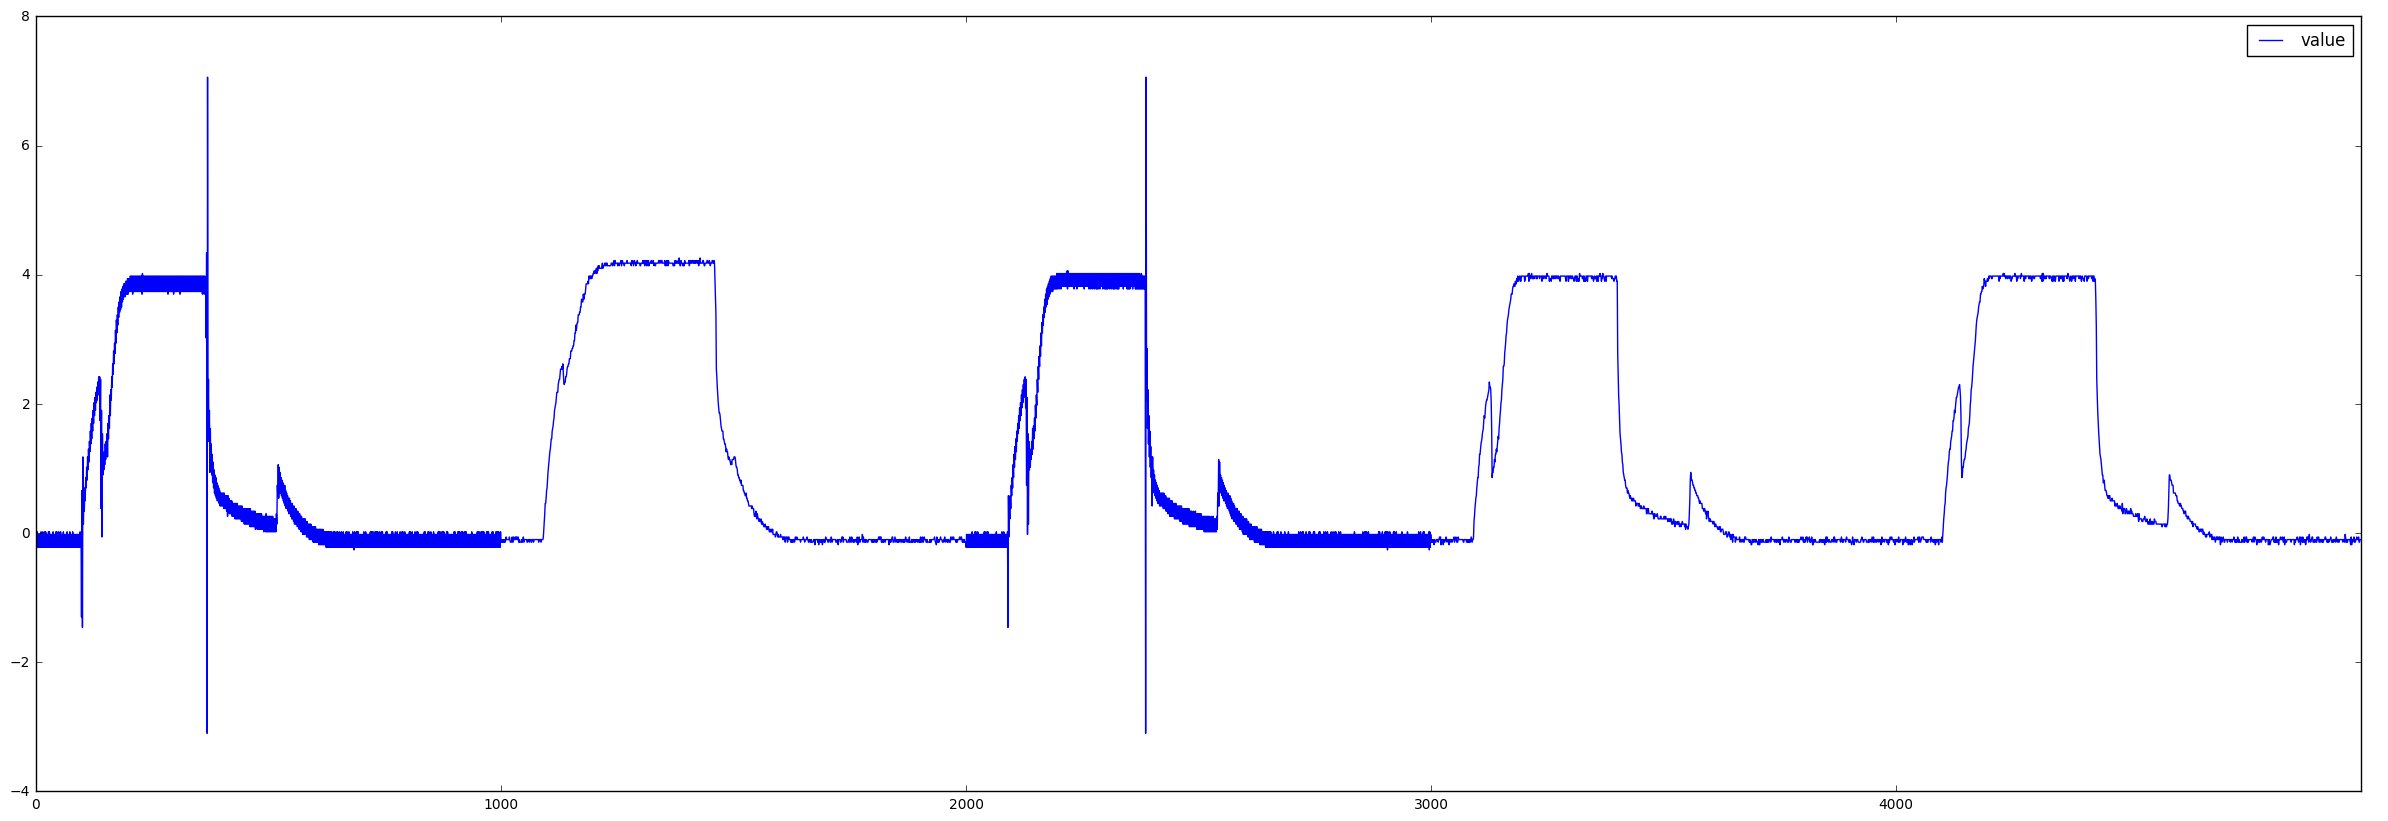

In [70]:
df1.plot(figsize=(30,10))
plt.show()

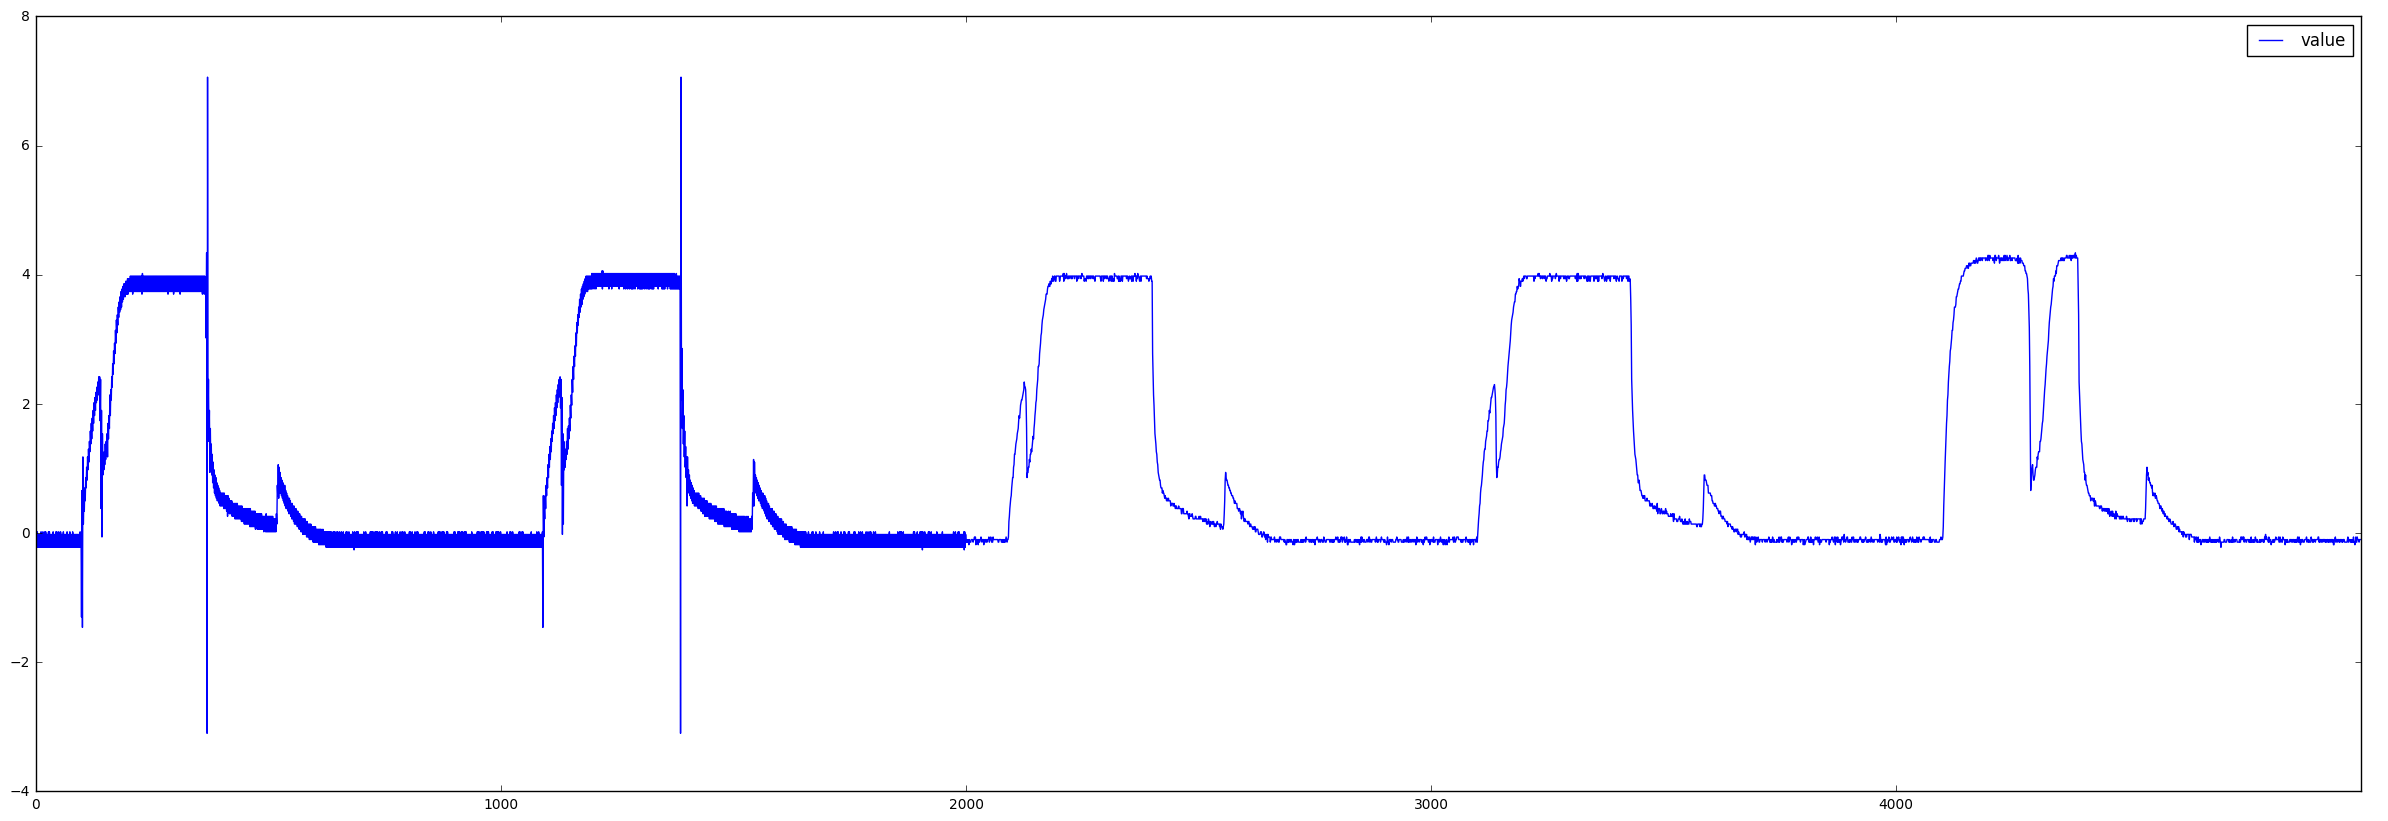

In [71]:
df2.plot(figsize=(30,10))
plt.show()

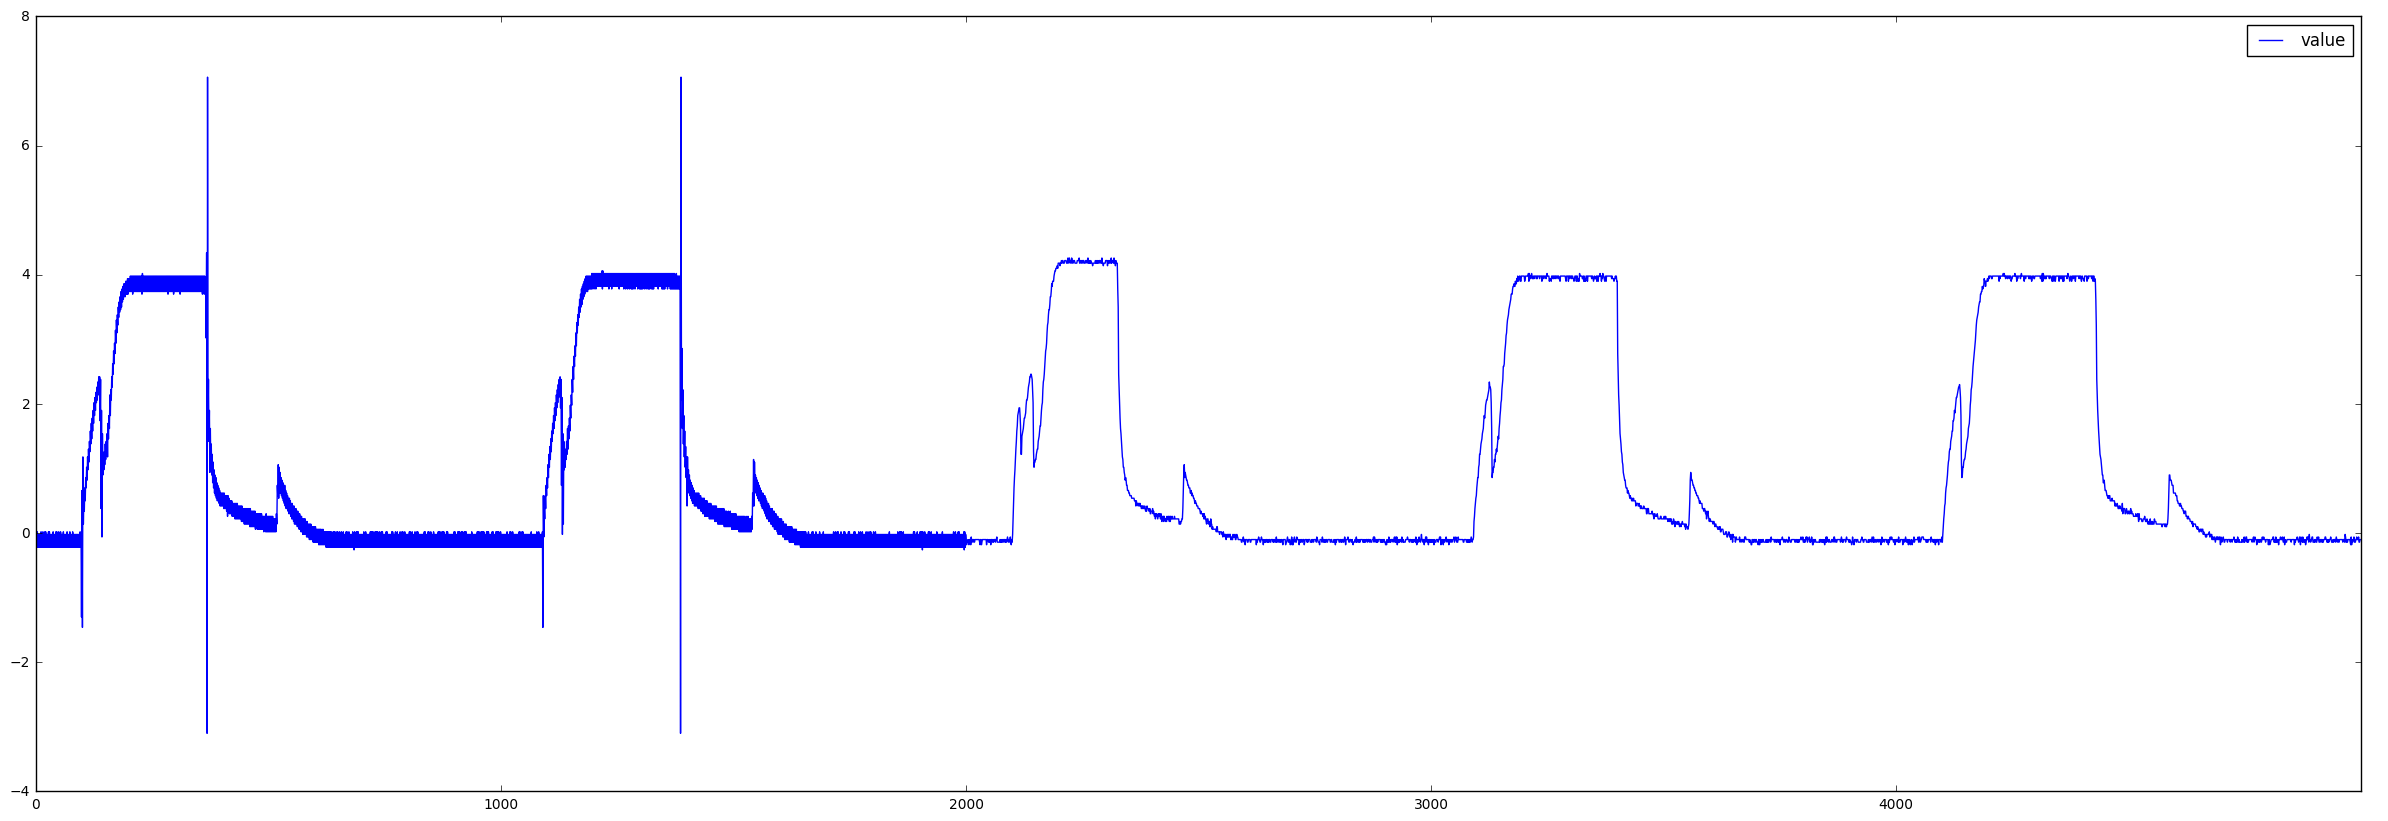

In [72]:
df3.plot(figsize=(30,10))
plt.show()

In [73]:
df.count()

value    15000
dtype: int64

In [74]:
df.tail()

,value
14995,-0.14
14996,-0.14
14997,-0.10
14998,-0.10
14999,-0.10


In [75]:
num_values = "num_values: %s"%(df.shape[0])
print num_values

num_values: 15000


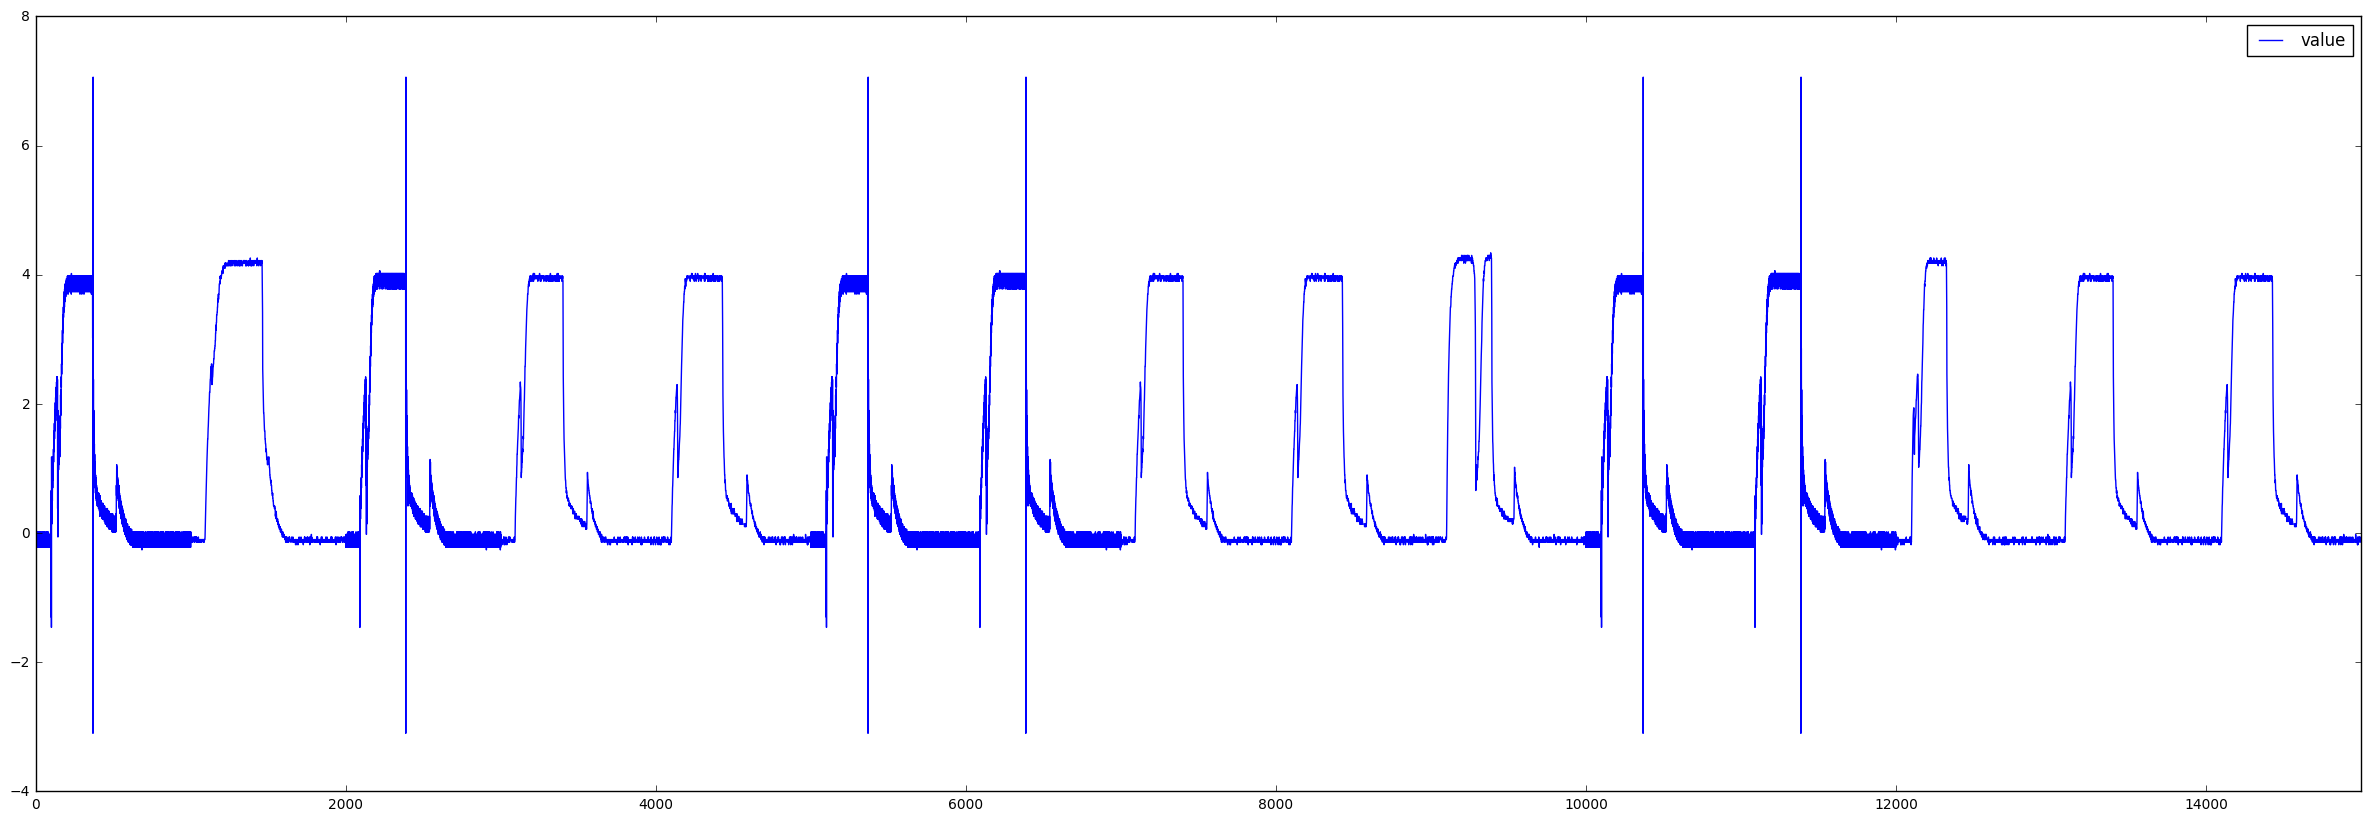

In [76]:
df.plot(figsize=(30,10))
plt.show()

In [77]:
df['anomaly'] = 0
df.head()

,value,anomaly
0,-0.22,0
1,0.02,0
2,-0.22,0
3,0.02,0
4,-0.22,0


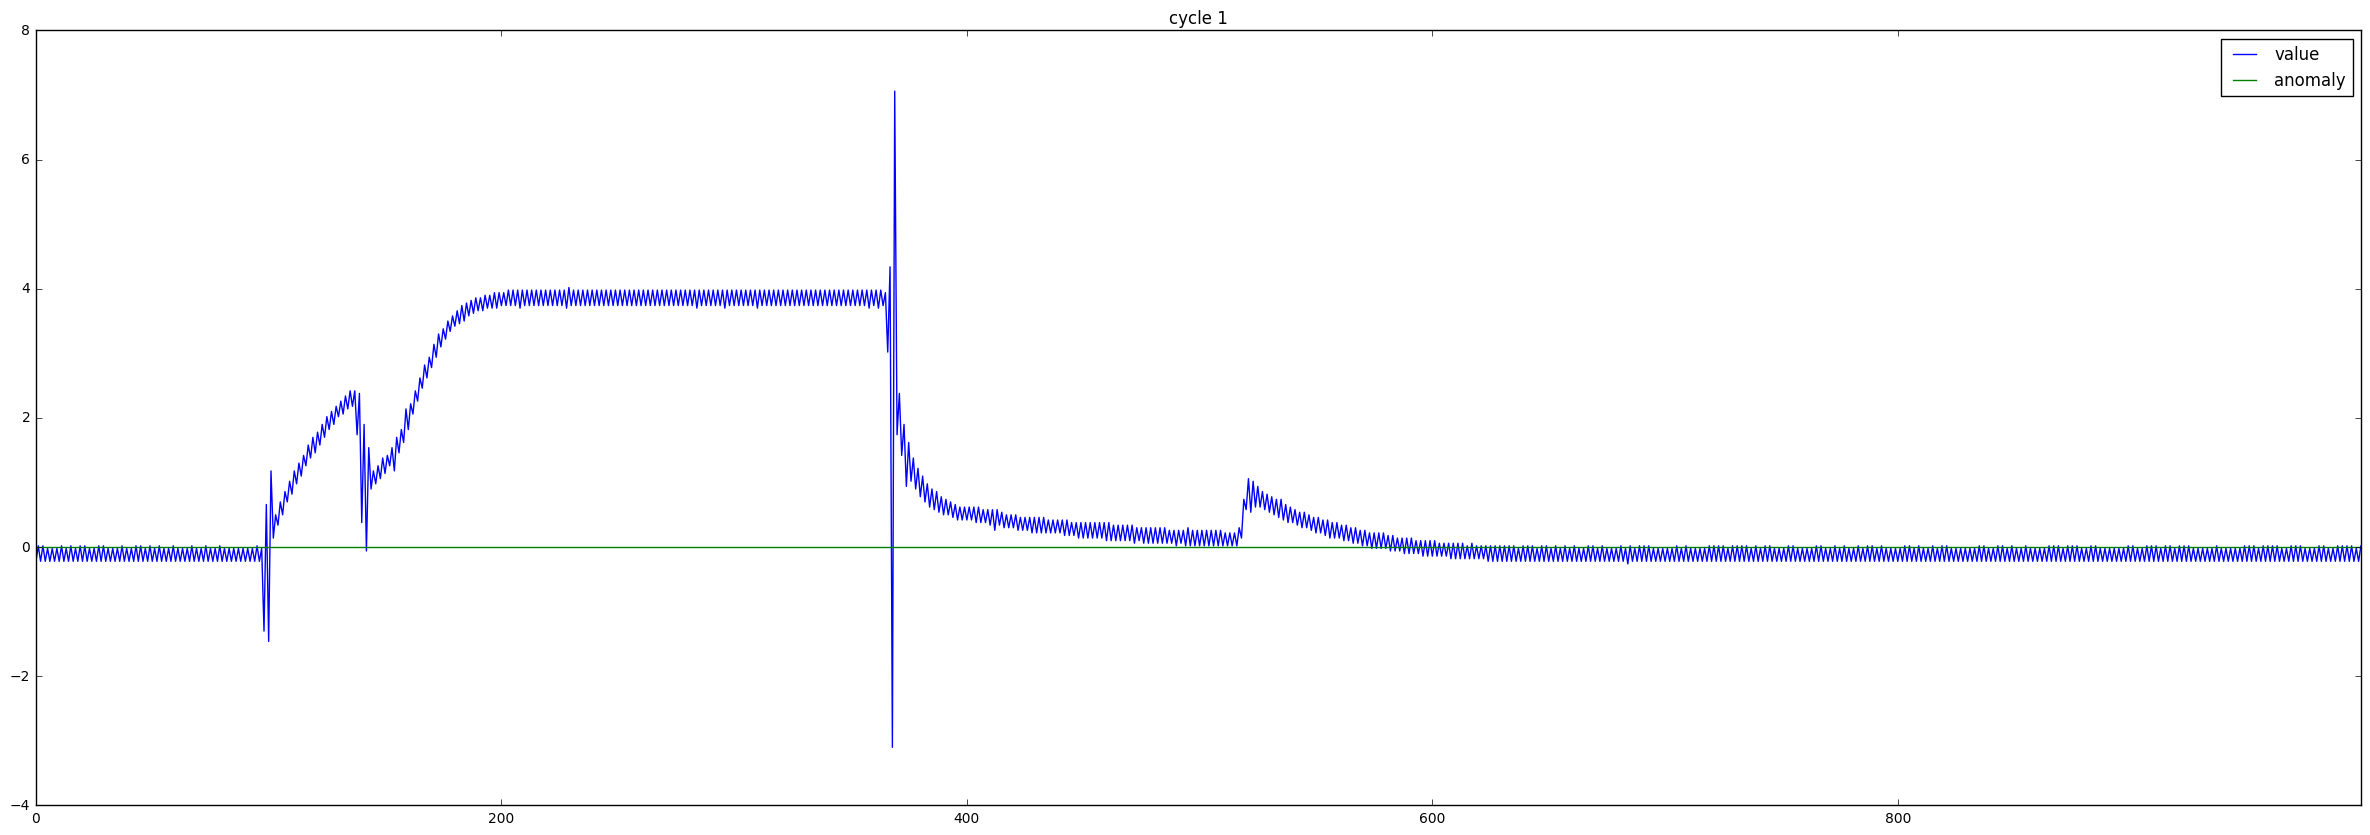

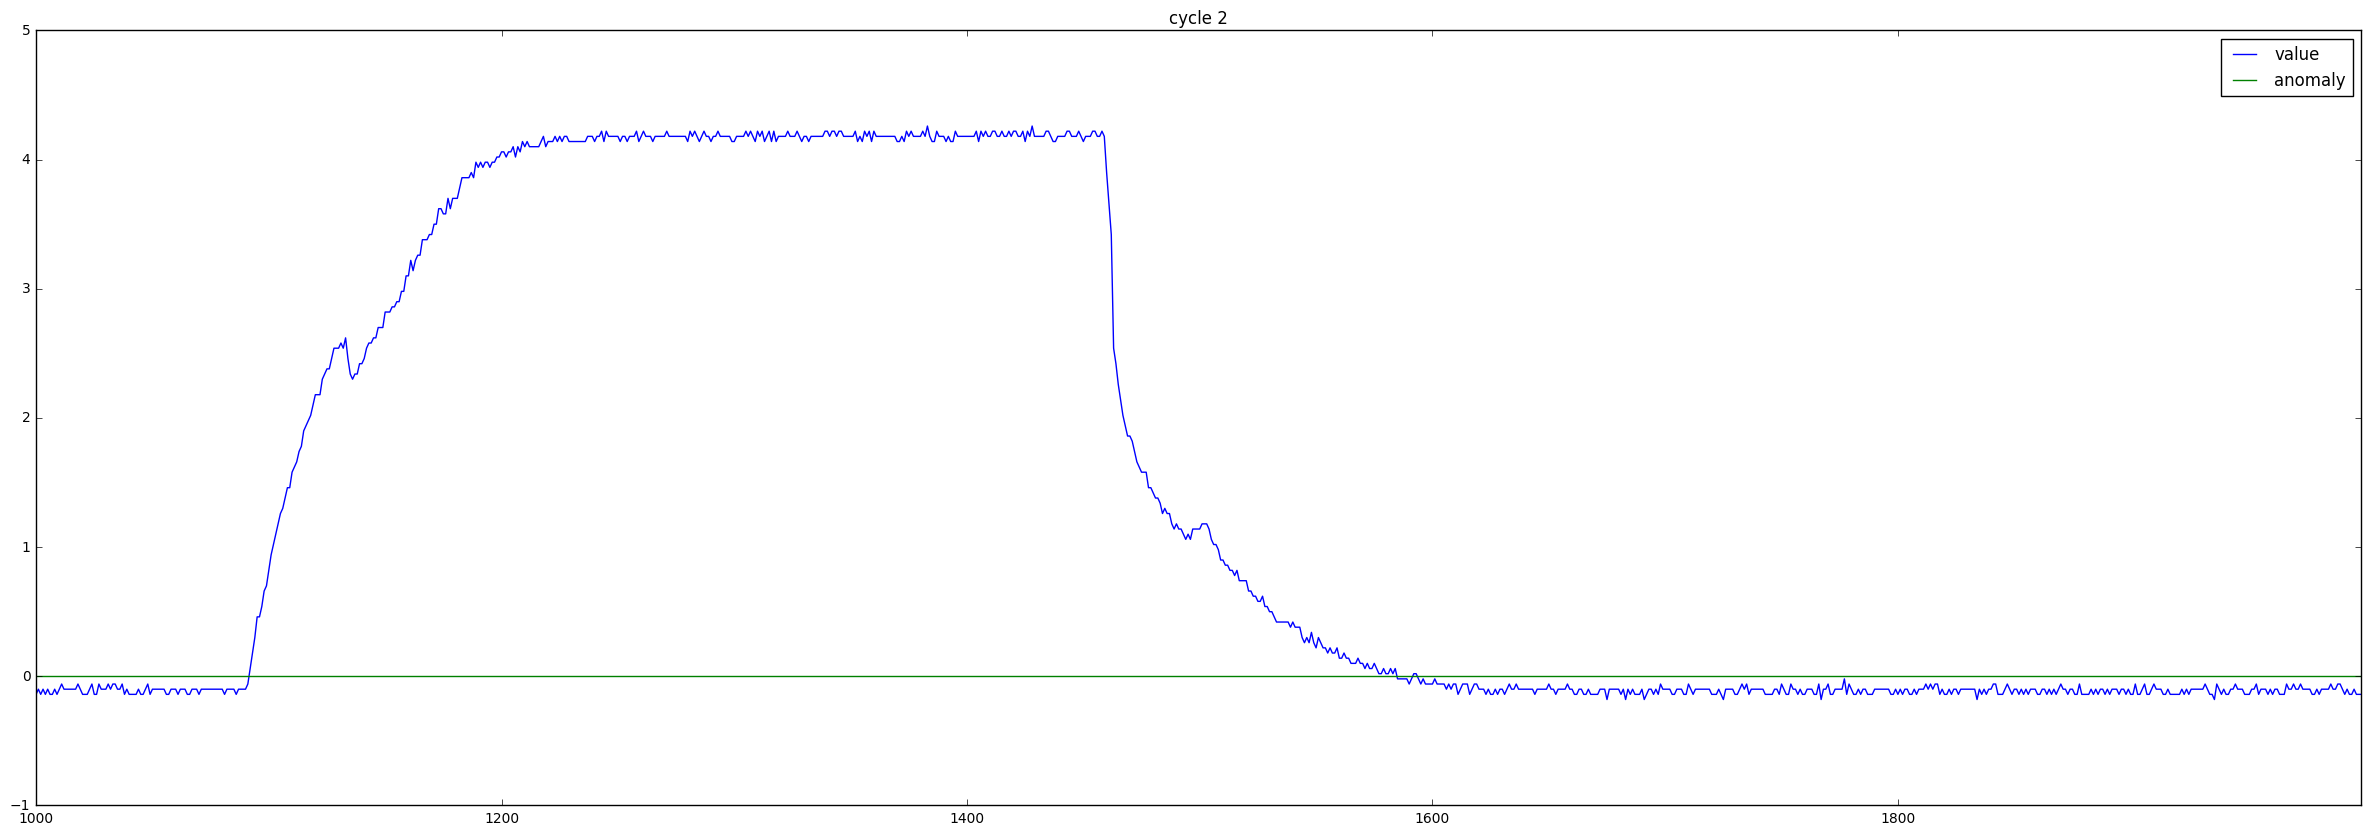

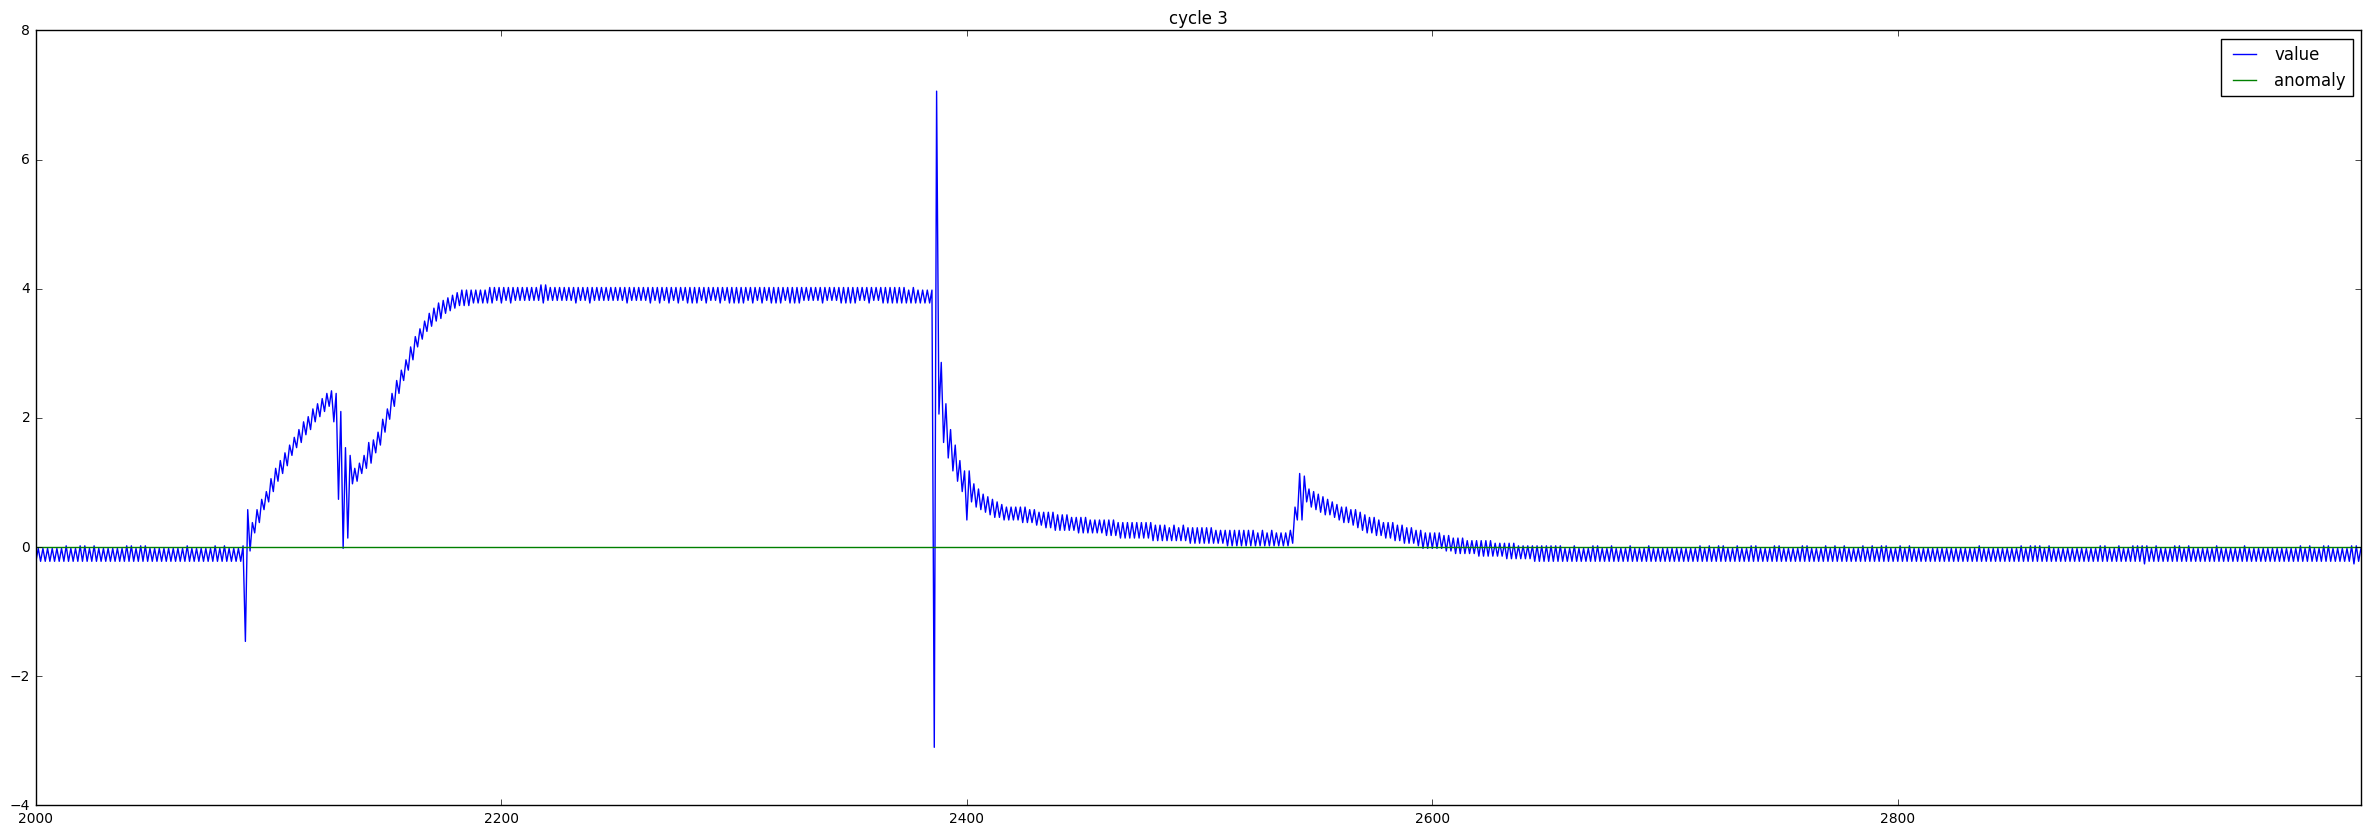

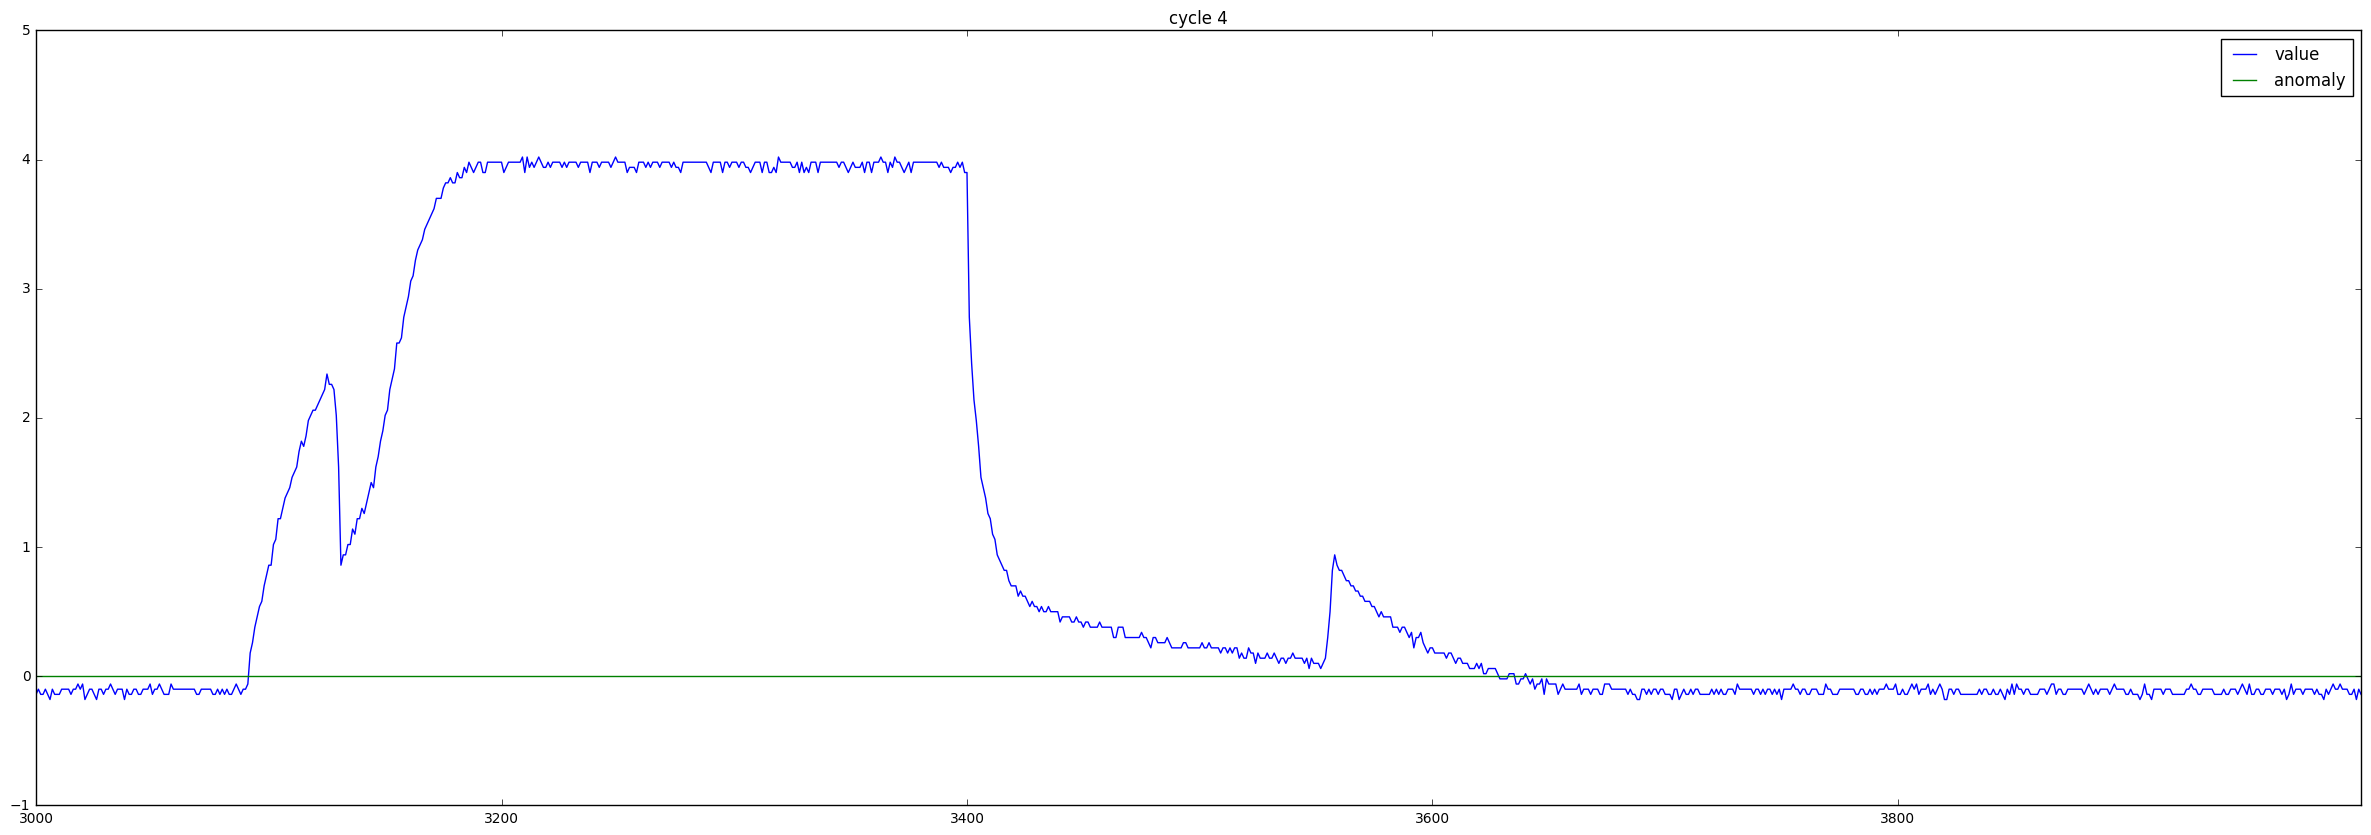

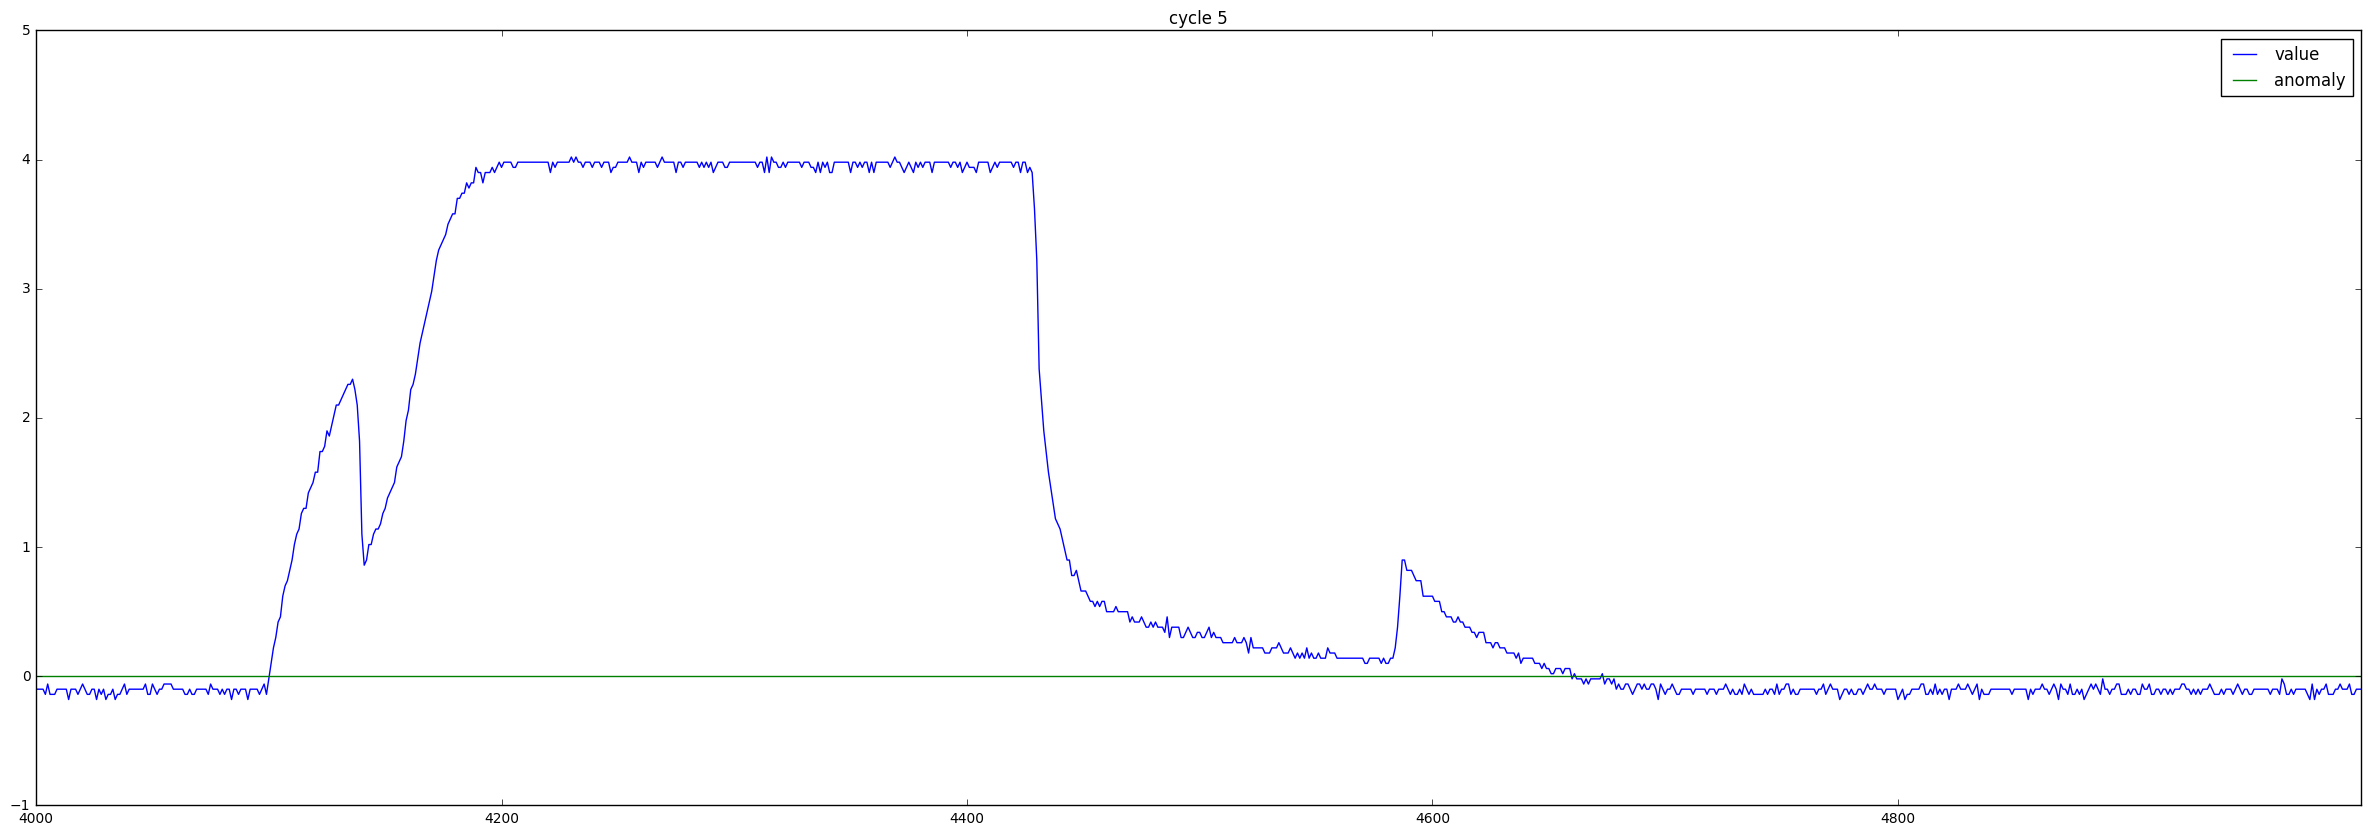

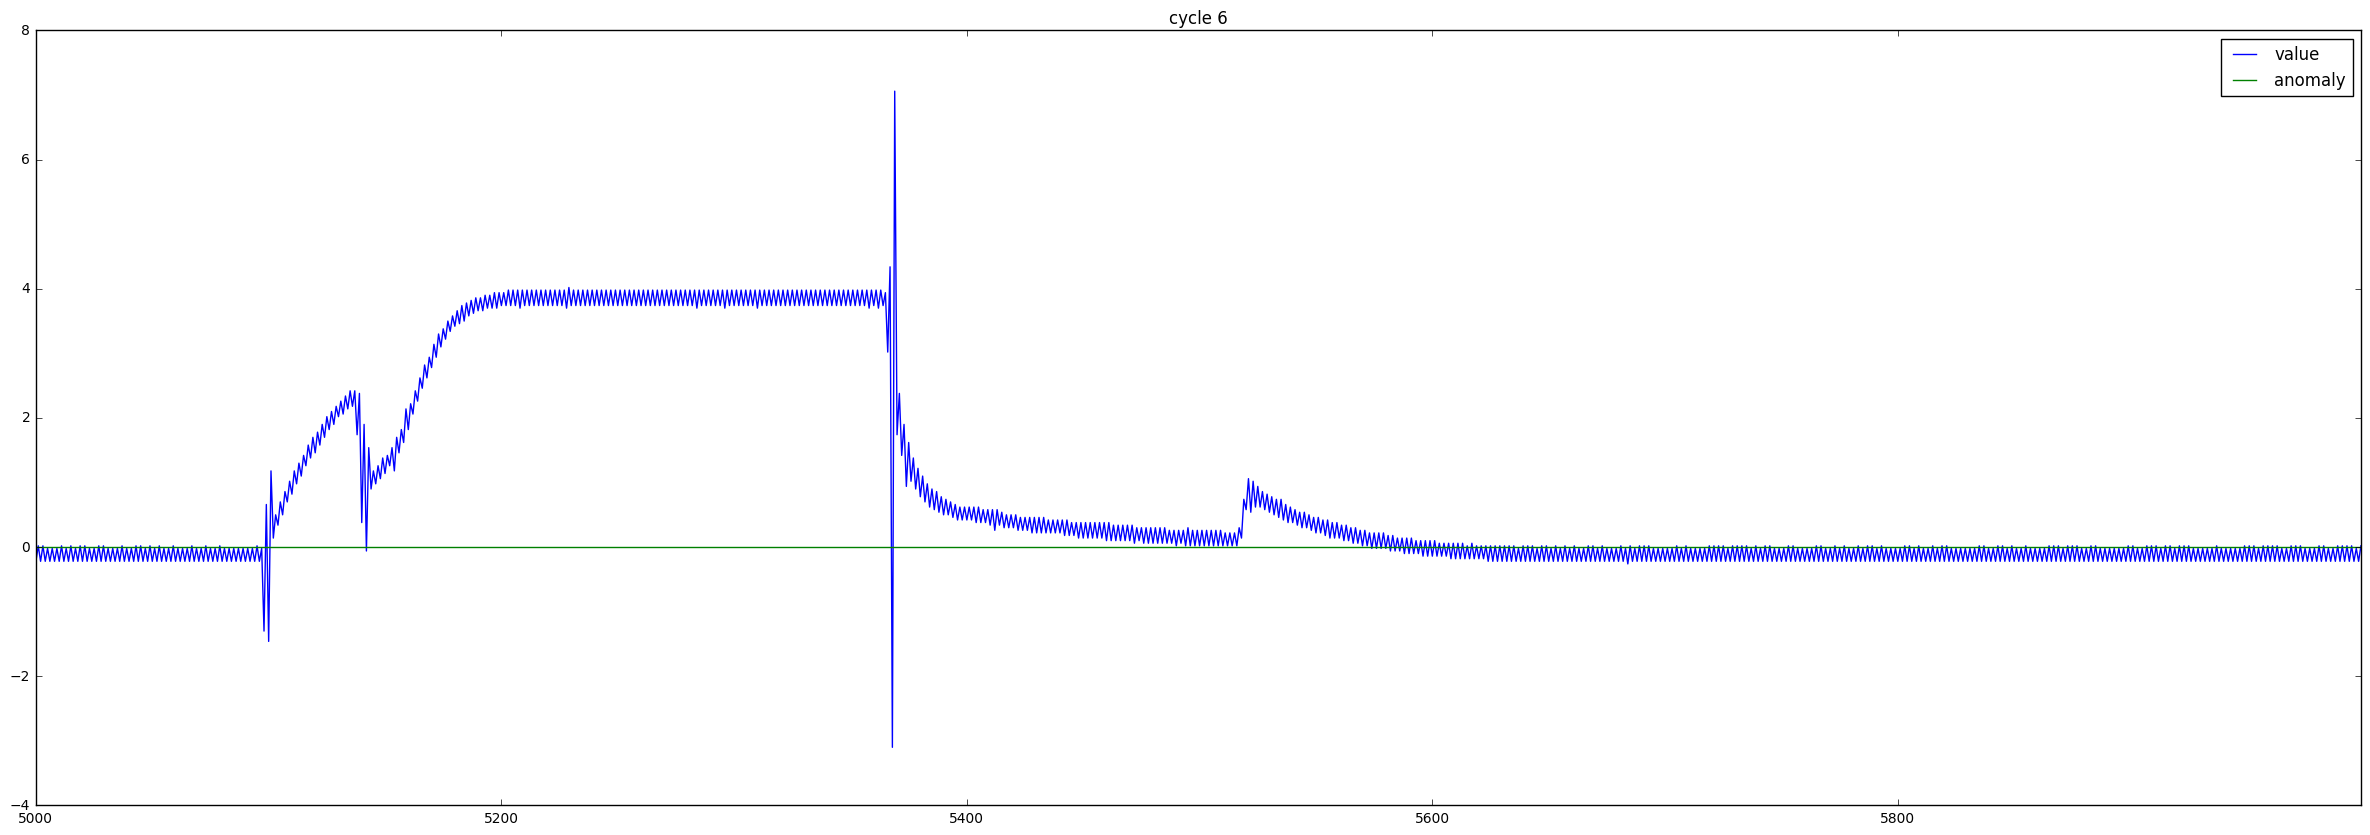

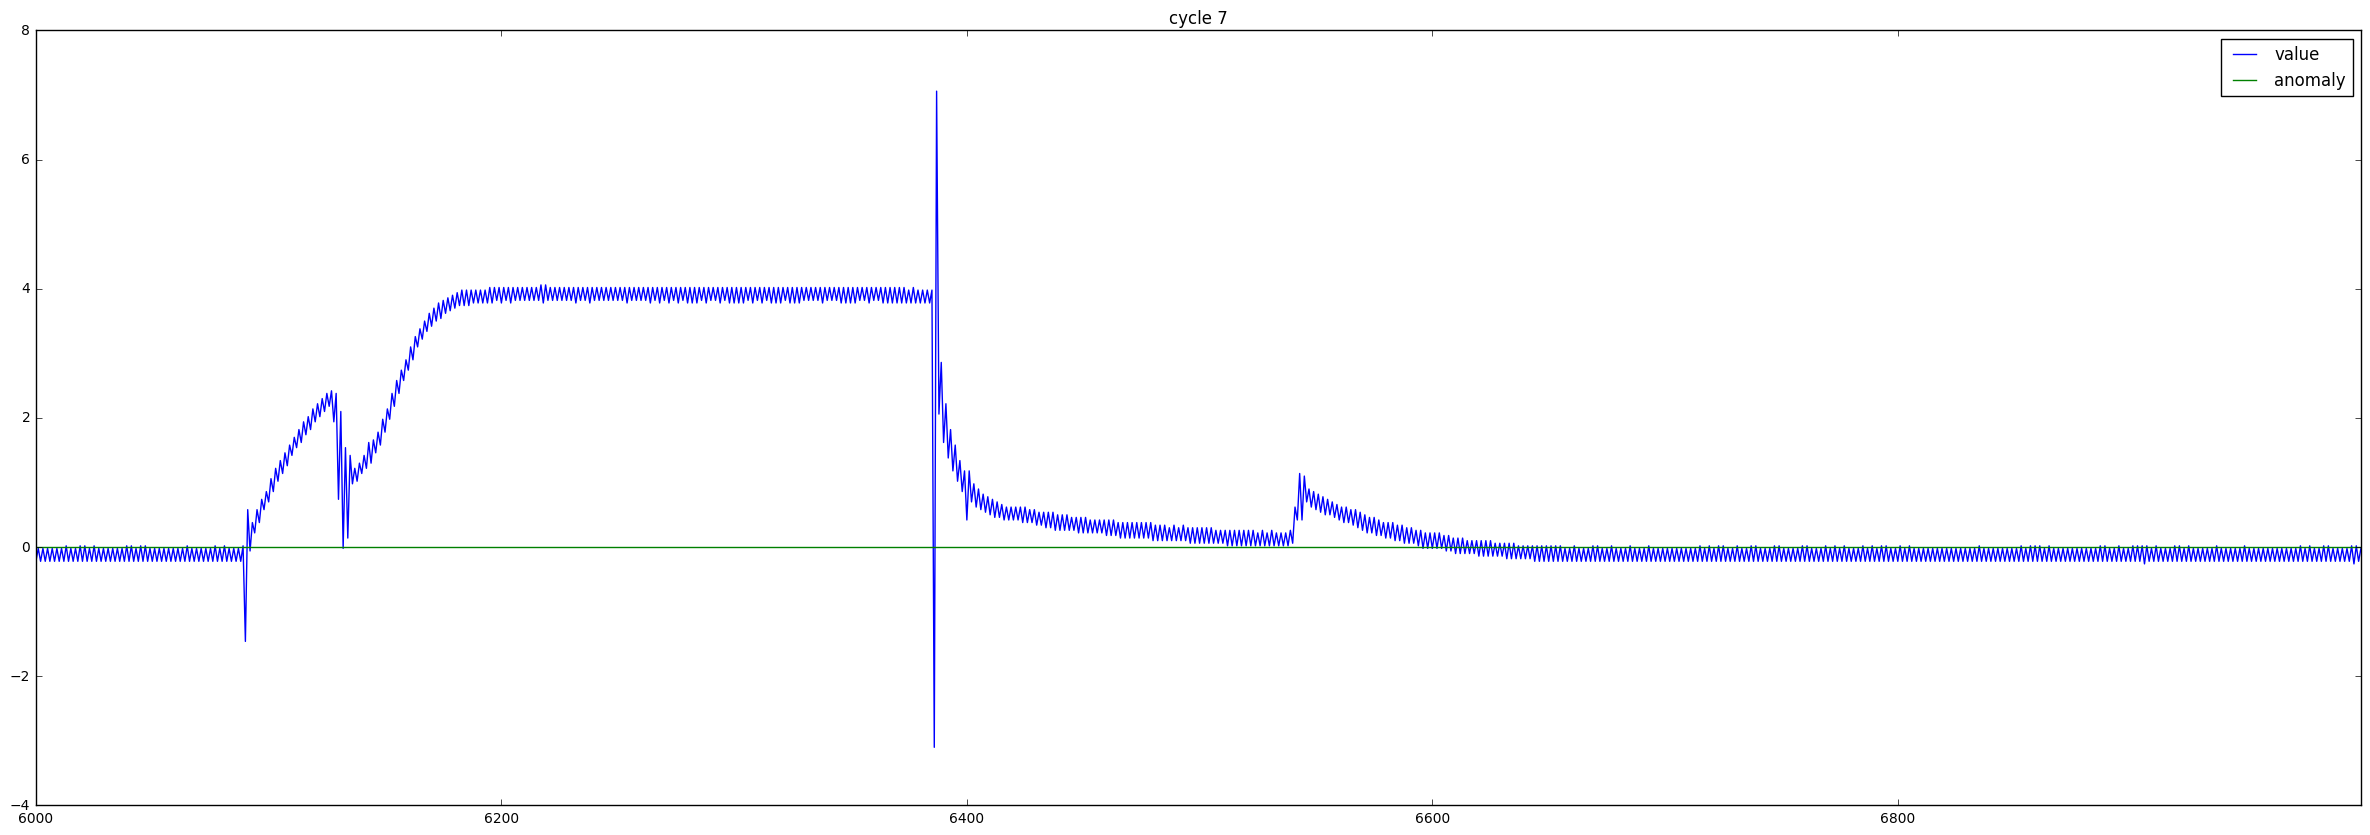

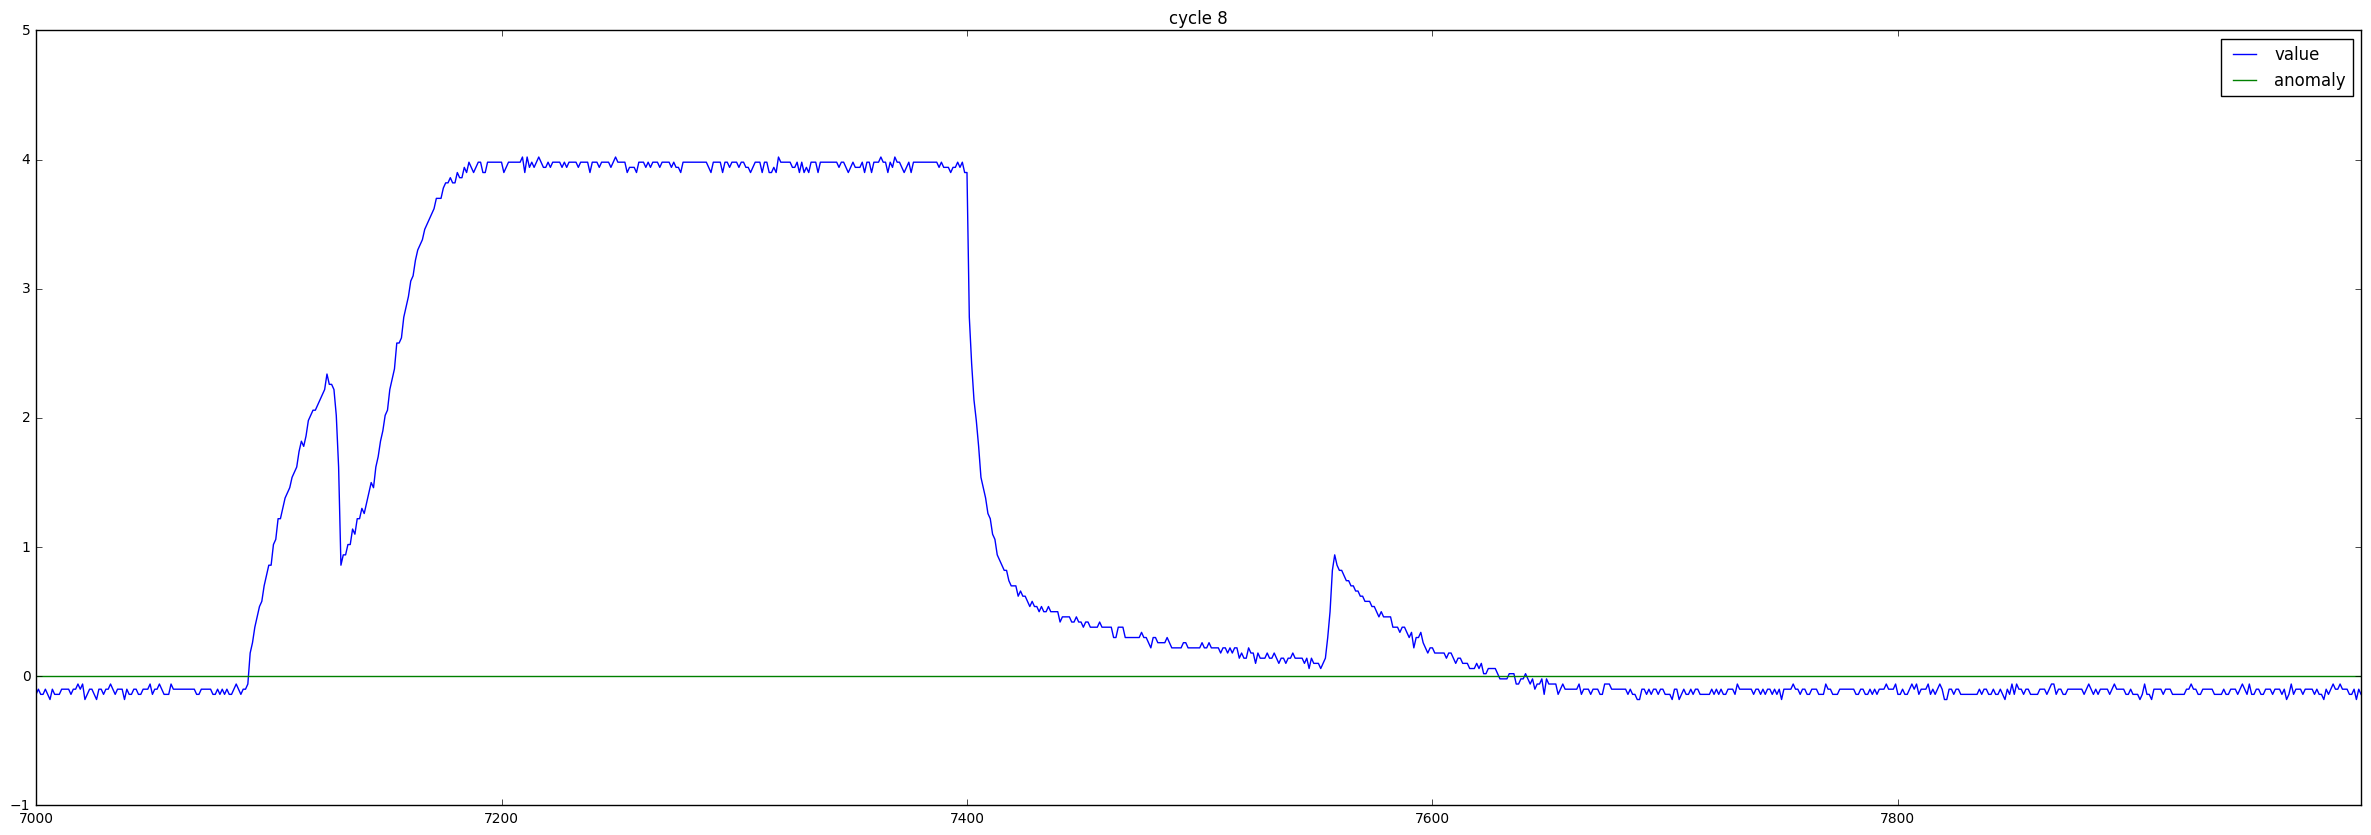

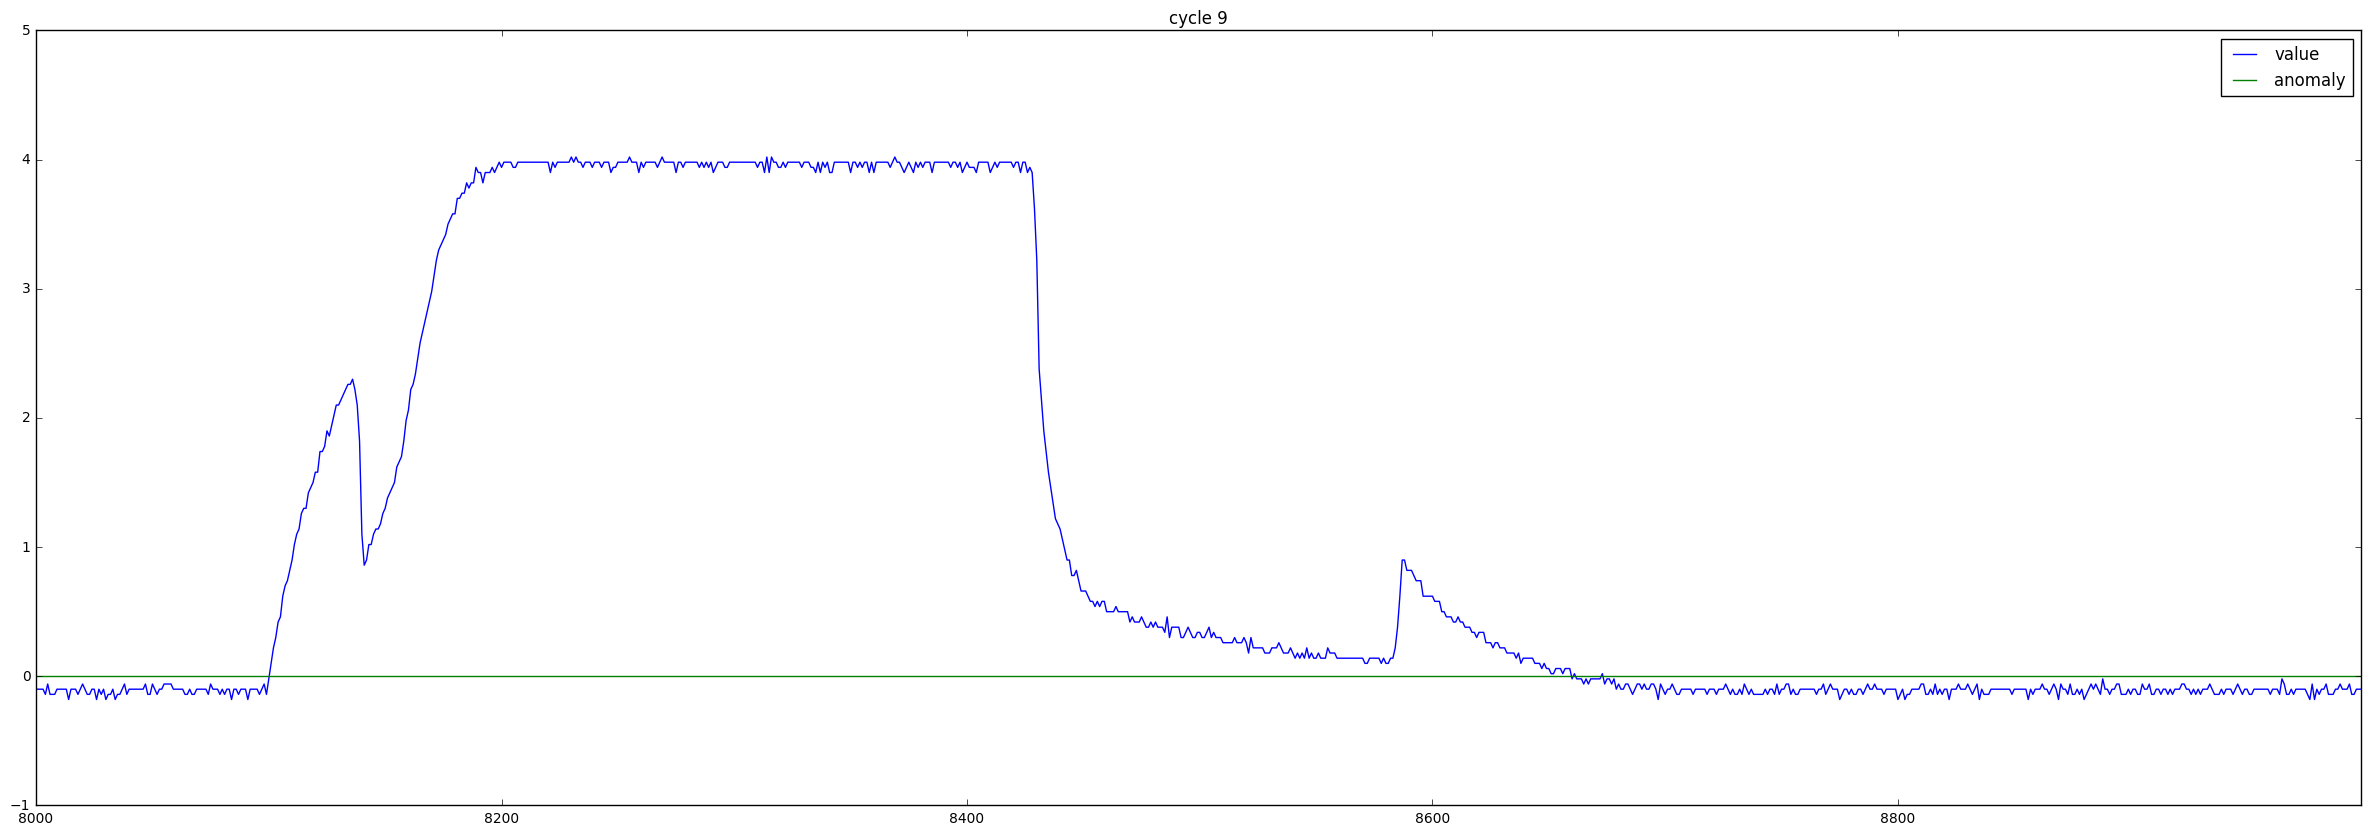

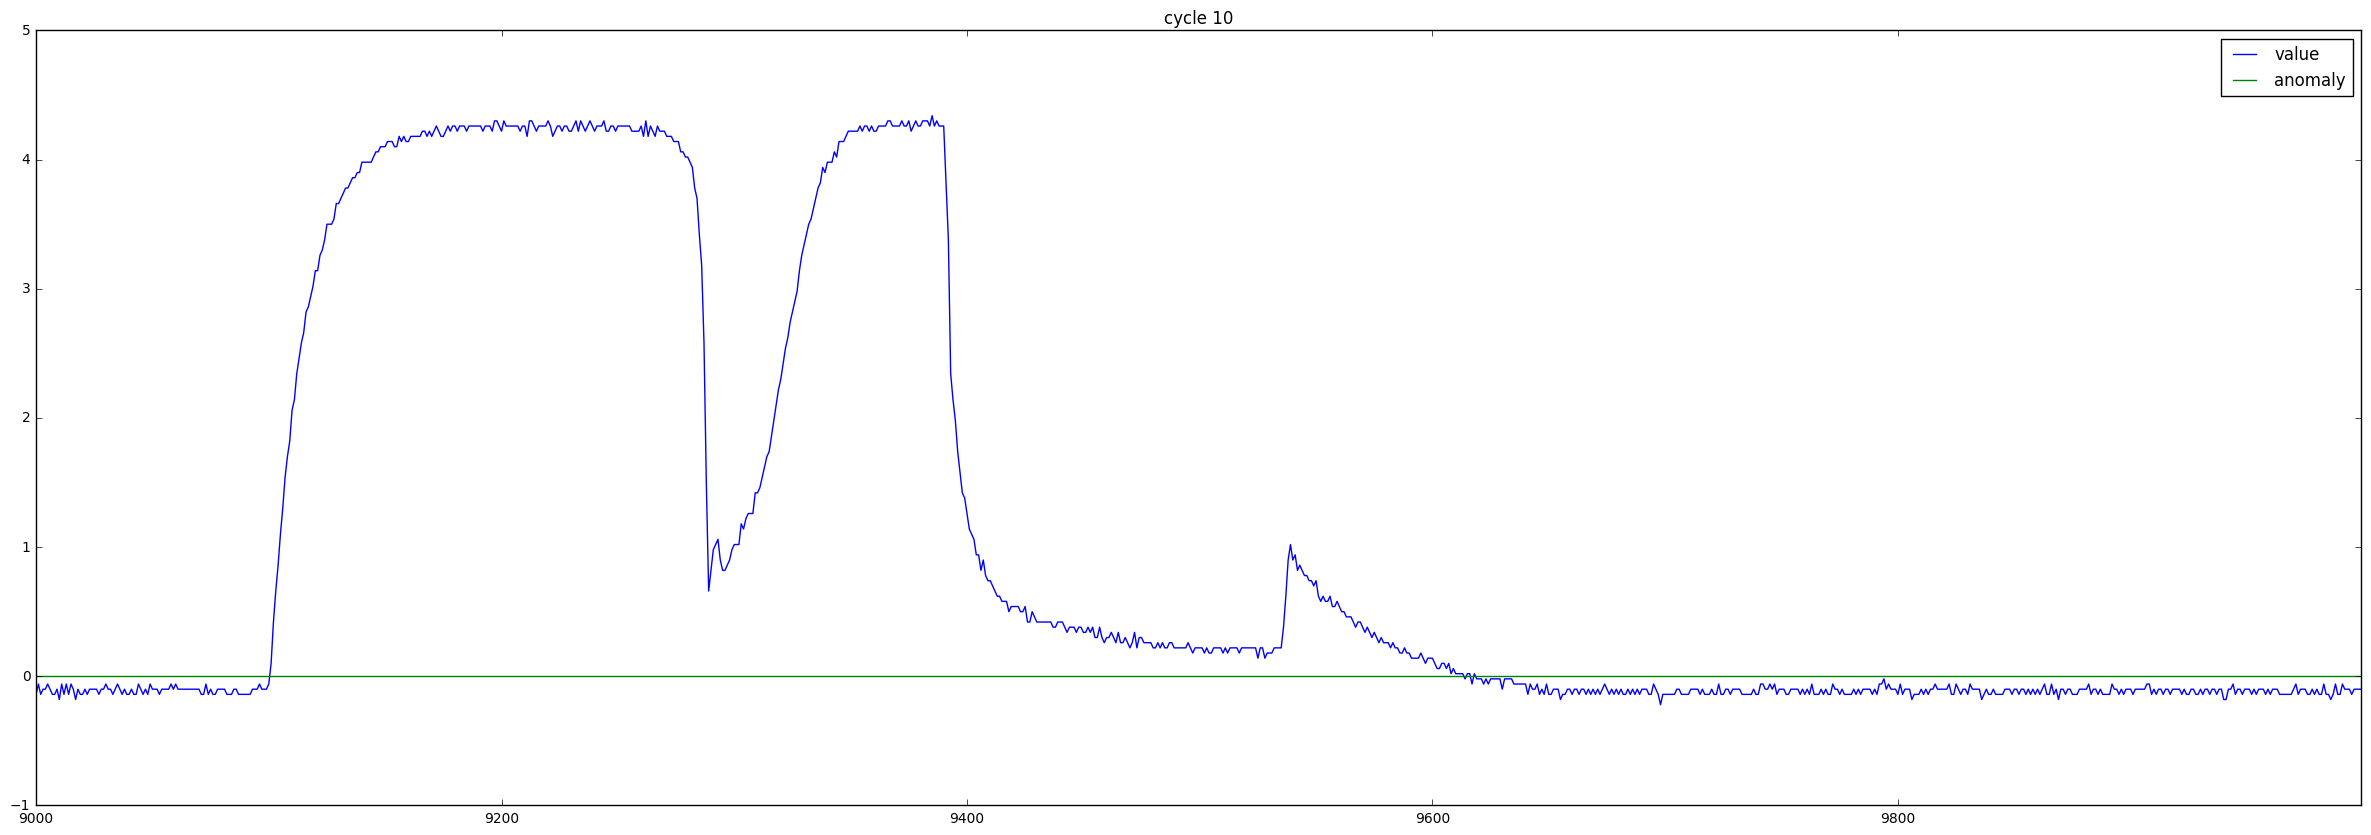

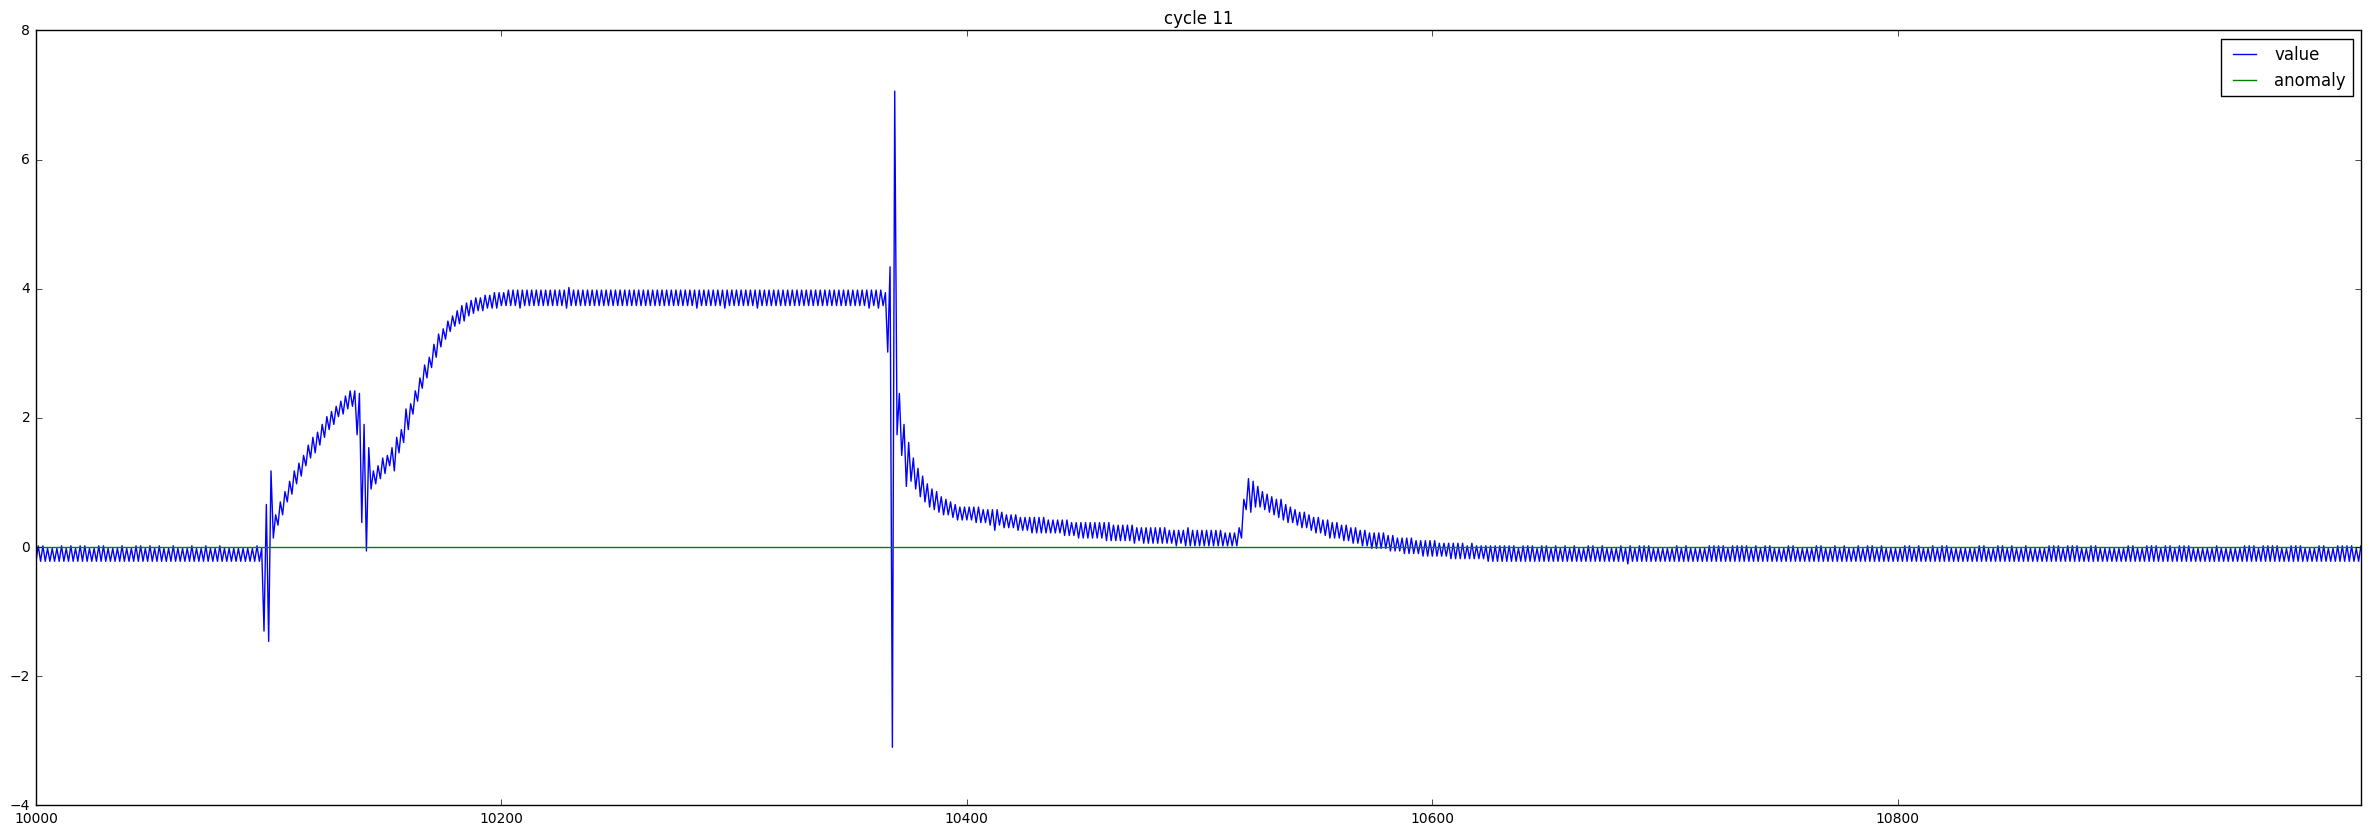

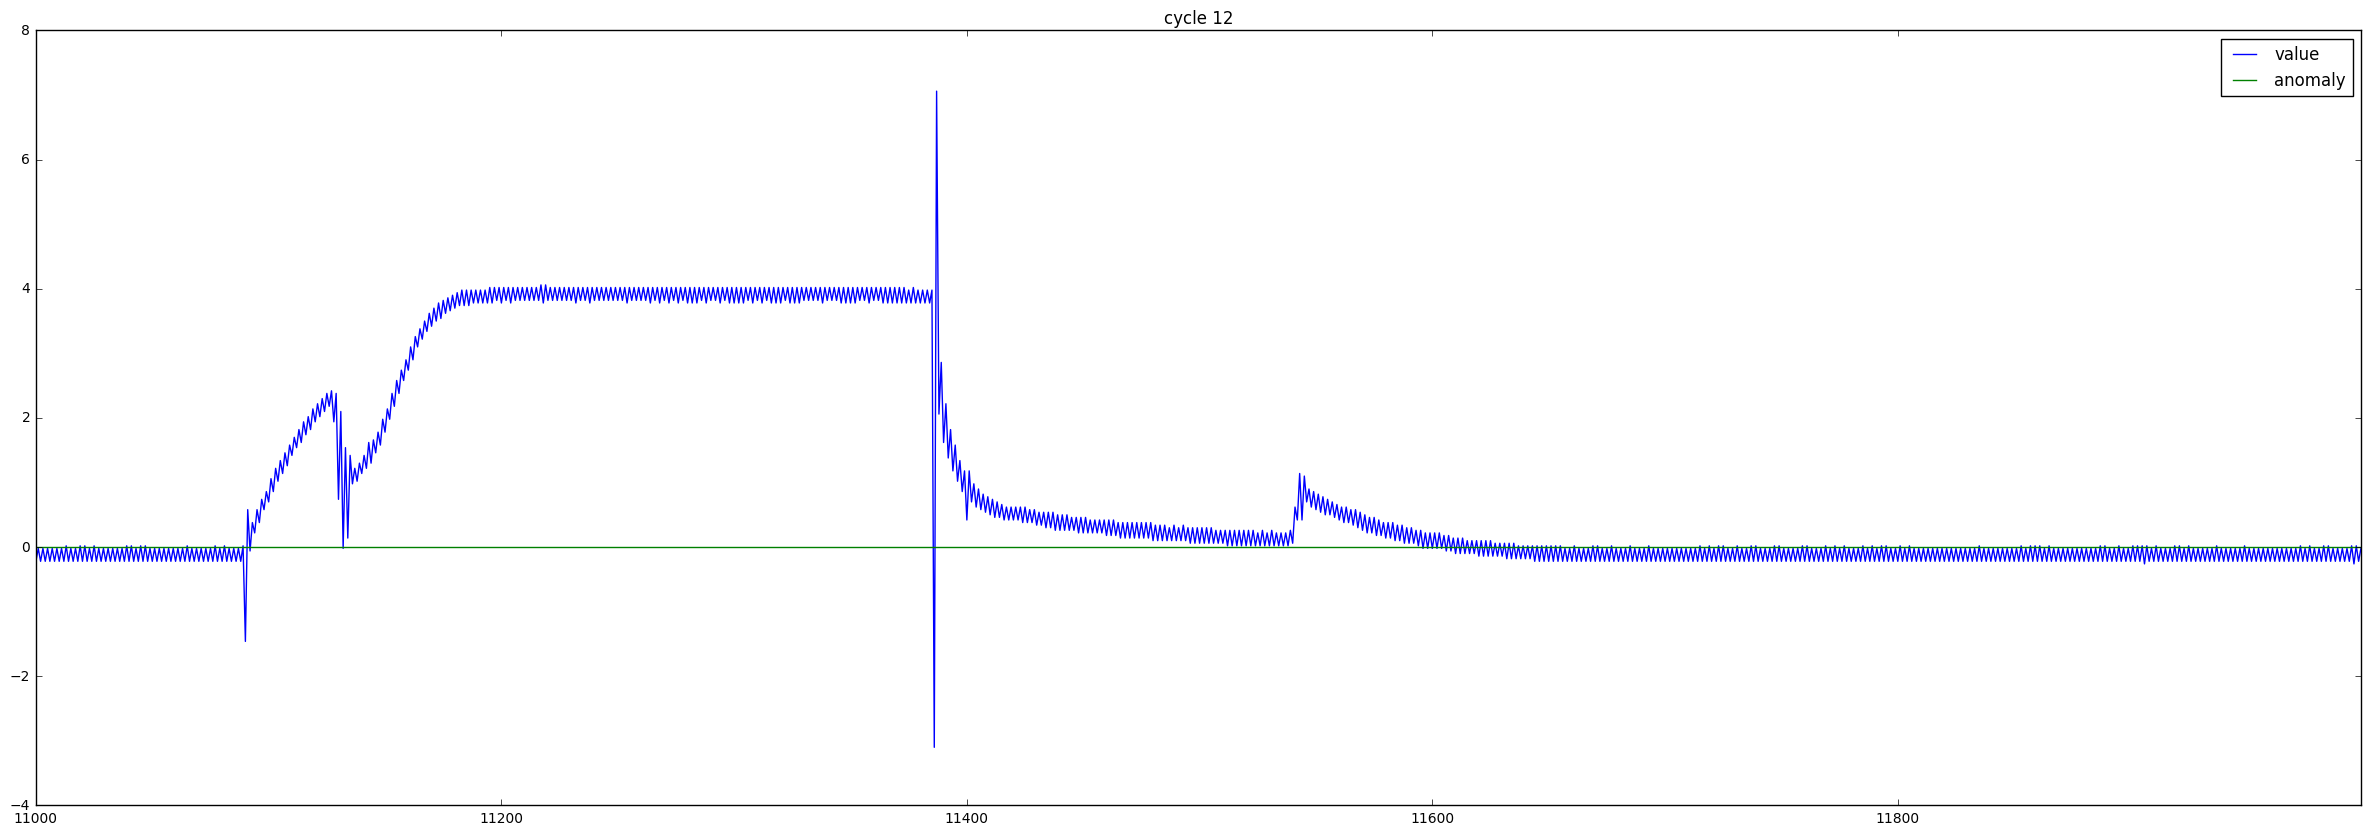

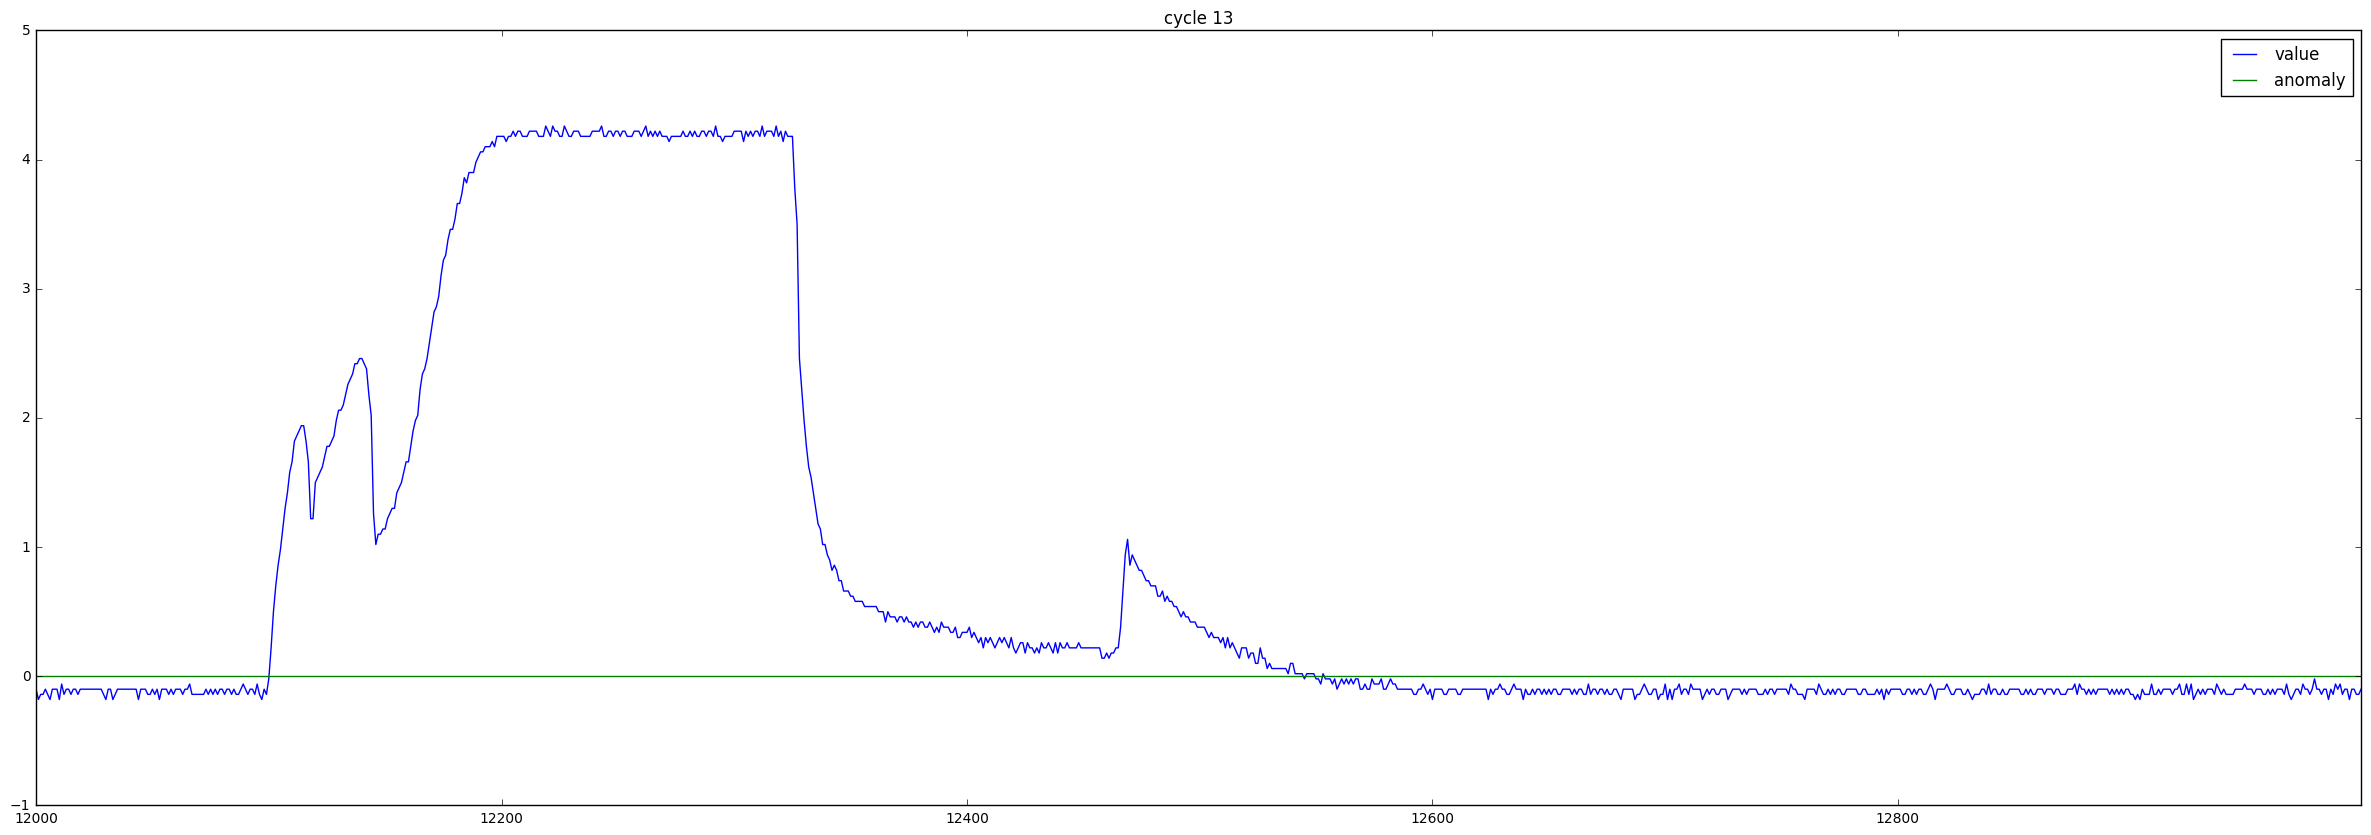

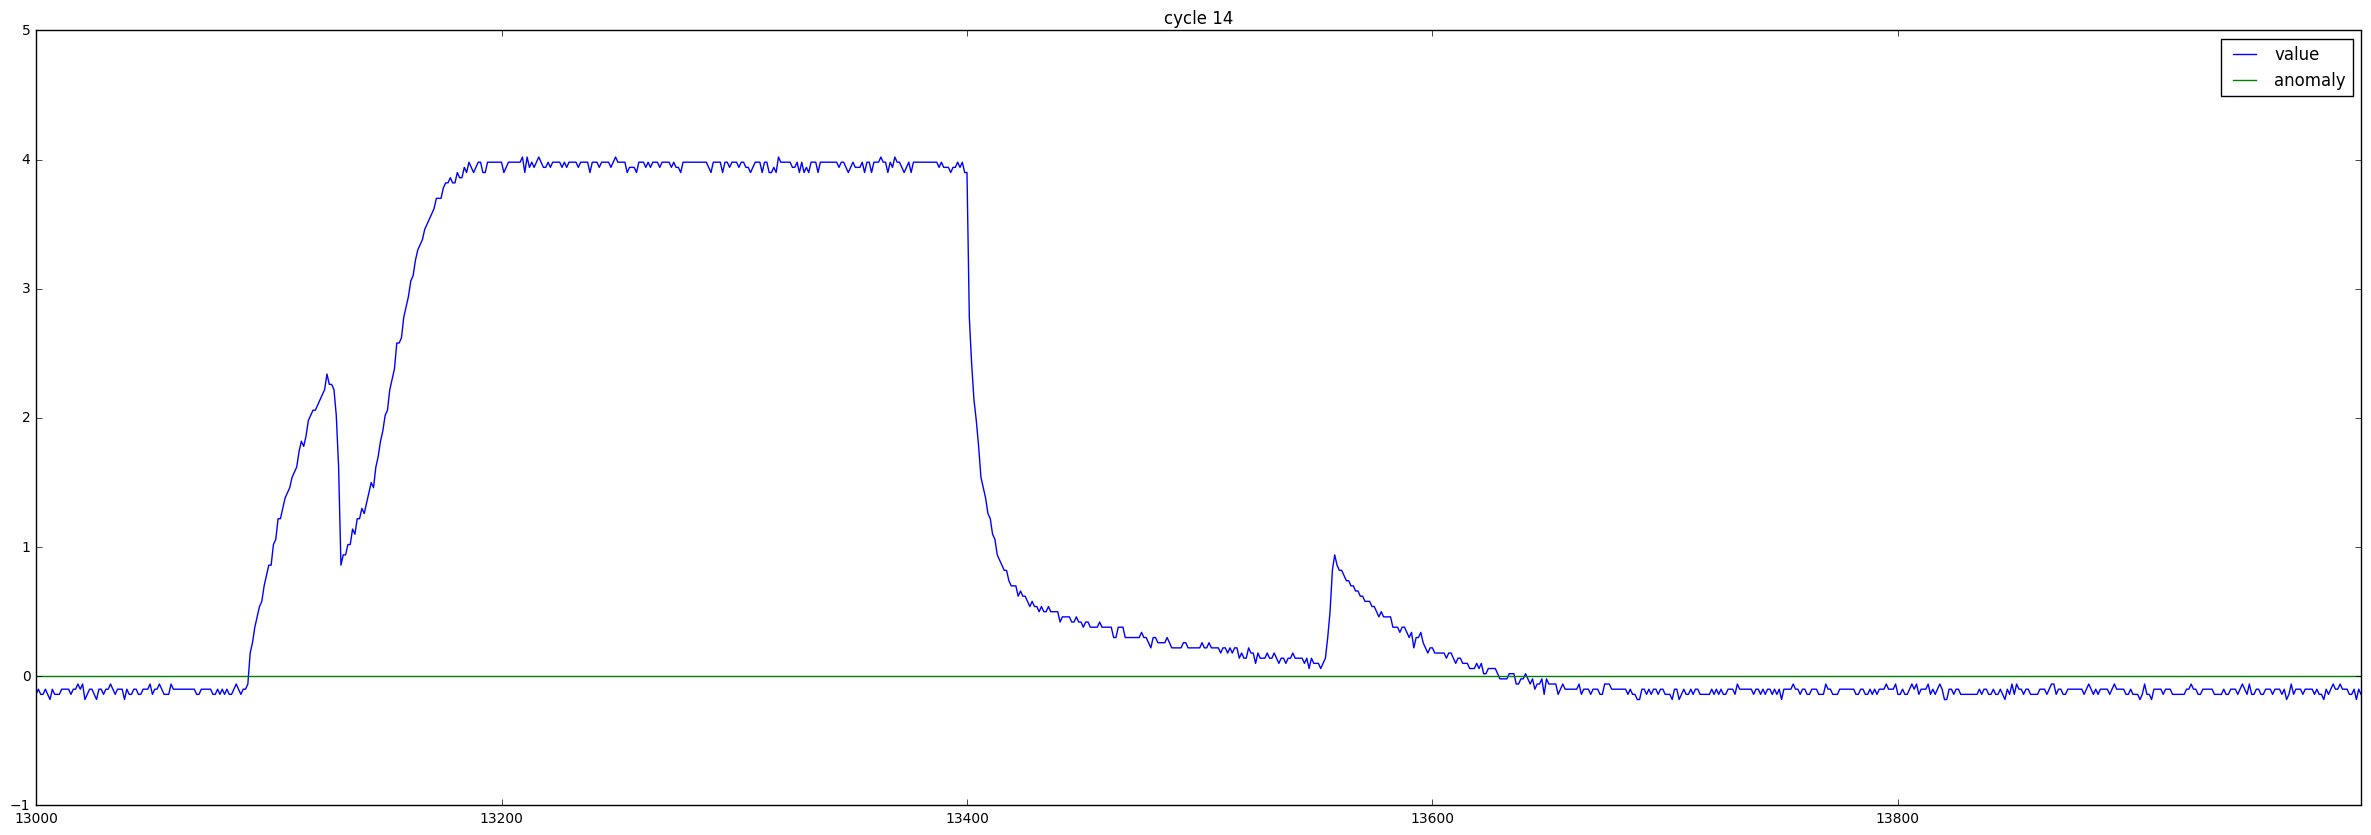

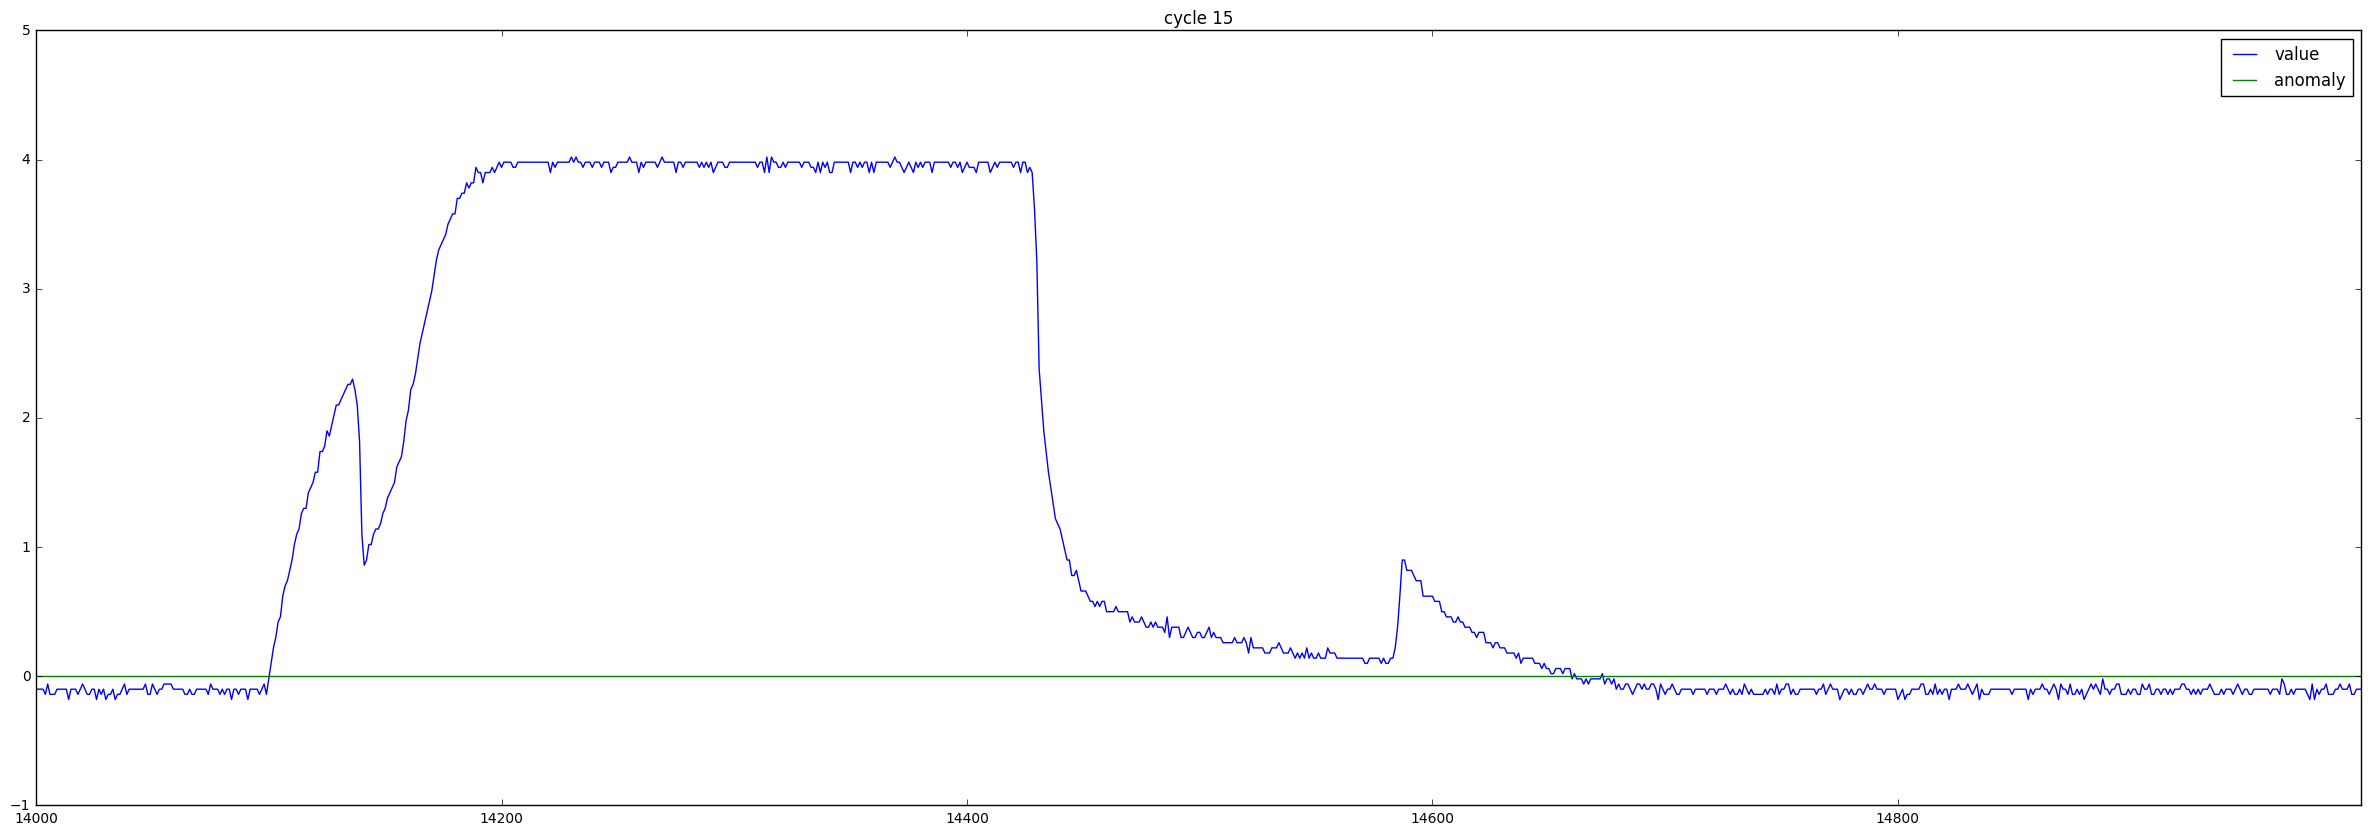

In [78]:
#iterate over a week. a week will have 672 values
step = 1000
for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    plt.title("cycle %s"%(i/step +1))
    plt.show()
    

In [79]:
anomaly_cycles = [1,2,3,6,7,10,11,12,13]
validation2_cycles = [1,2,3,6,7,10,11,12,13]
test_cycles = [1,2,3,6,7,10,11,12,13]
train_cycles = [4,5,8,9,14,15]
validation1_cycles = [14]
df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []
step = 1000
for i in range(0,df.shape[0],step):
    cycle = i/step +1
    if cycle in train_cycles:
        df_train_list.append(df[i:i+step])
        
    if cycle in validation1_cycles:
        df_valid1_list.append(df[i:i+step])
        
    if cycle in validation2_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
        
    if cycle in test_cycles:
        if cycle in anomaly_cycles:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])

print len(df_train_list)
print len(df_valid1_list)
print len(df_valid2_list)
print len(df_test_list)
   

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


6
1
9
9


In [80]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

In [81]:
df_dict['test'].head()

,value,anomaly
0,-0.22,1
1,0.02,1
2,-0.22,1
3,0.02,1
4,-0.22,1


In [82]:
# plt.figure()
# df['value'].plot(figsize=(15,5))
# rows = df[df.anomaly.isin([1])].itertuples()
# for row in rows:
#     plt.plot(row[0], row[1], 'r.', markersize=5.0)
# plt.show()

Size of test: 9000
Size of validation1: 1000
Size of validation2: 9000
Size of train: 6000
Total: 25000
Ratio of test: 0.360000
Ratio of validation1: 0.040000
Ratio of validation2: 0.360000
Ratio of train: 0.240000


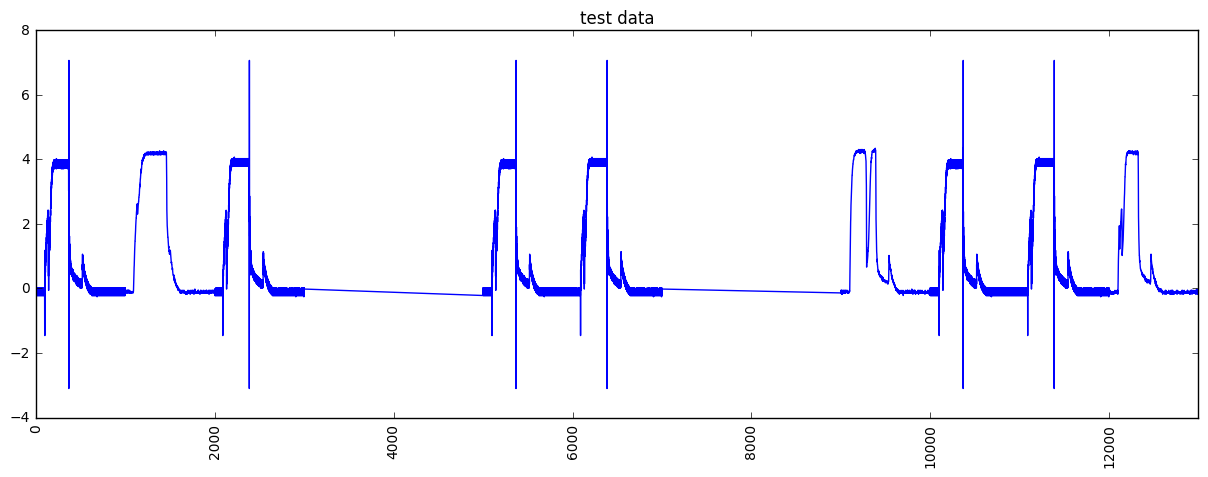

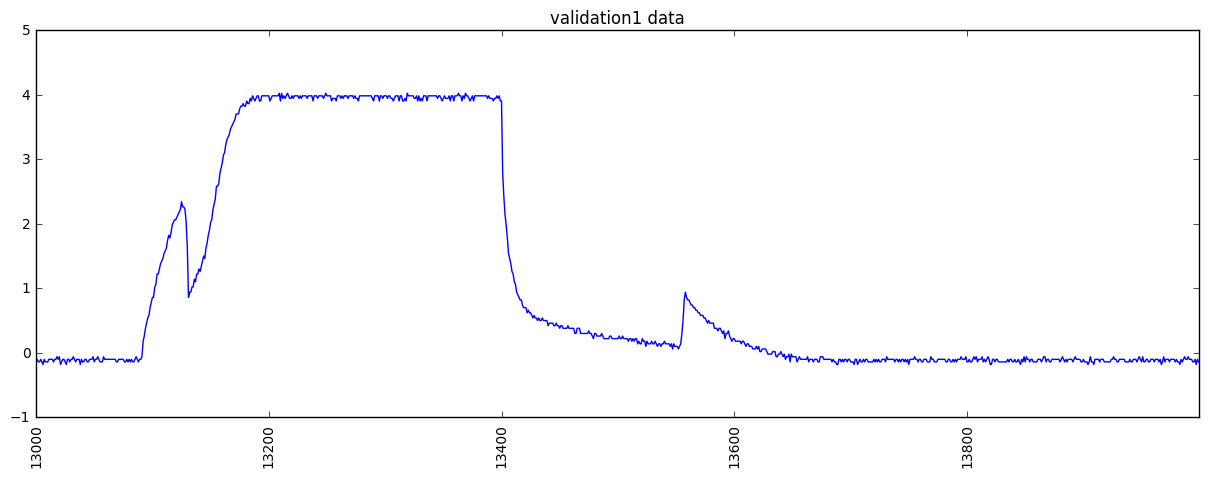

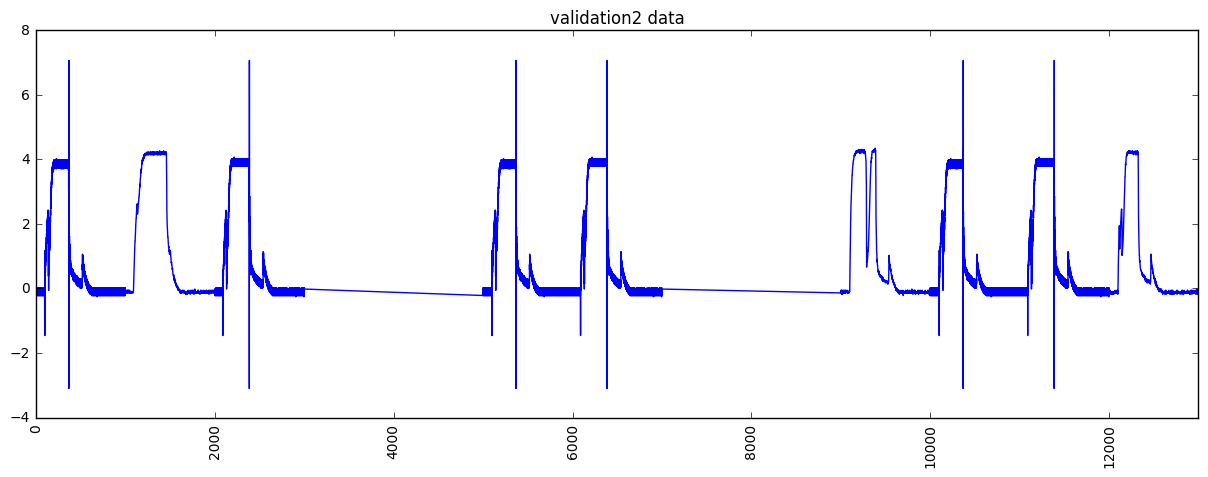

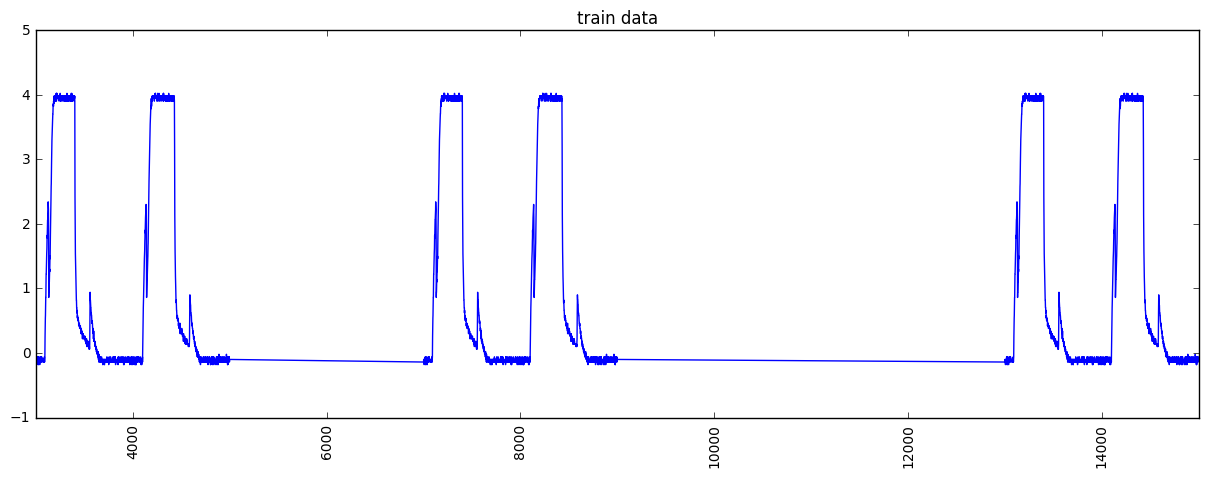

In [83]:
count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    df_tmp['value'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
#     for row in rows:
#         plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [85]:
for key in df_dict:
    np.save("../resources/data/discords/space_shuttle/%s"%(key),df_dict[key])

In [117]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [118]:
data_folder = "../resources/data/discords/space_shuttle/"

In [119]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(5800, 50)
(5800,)


In [120]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


(8800, 50)
(8800,)
(8400, 100, 1)
(8400, 100)


In [121]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(8800, 50)
(8800,)
(8850, 50)


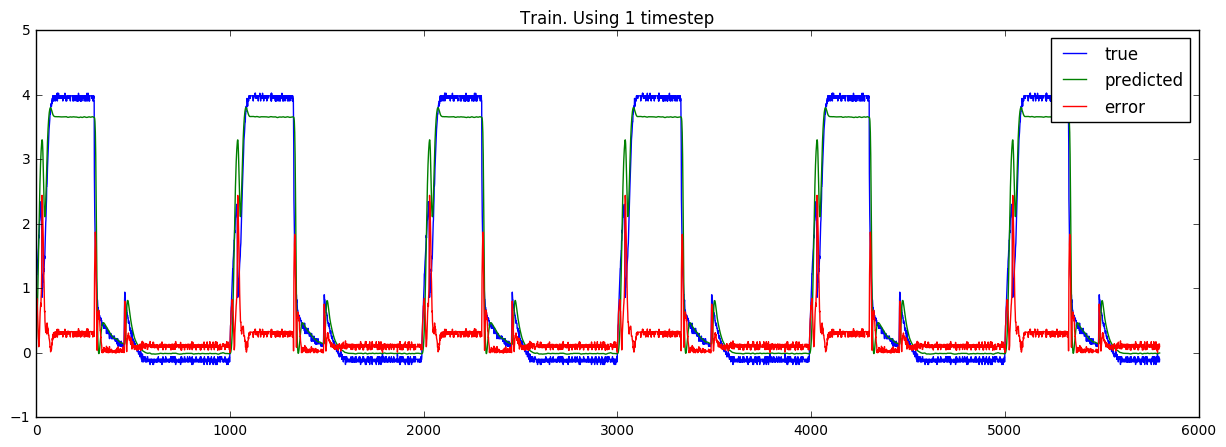

In [122]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[-0.01820994 -0.01823232 -0.01826308 -0.01830383 -0.01835622 -0.01842198
 -0.01850298 -0.01860129 -0.01871905 -0.01885842 -0.01902145 -0.0192099
 -0.01942518 -0.01966828 -0.01993967 -0.02023938 -0.02056713 -0.02092217
 -0.02130331 -0.02170916 -0.02213816 -0.0225886  -0.02305858 -0.02354609
 -0.02404912 -0.02456574 -0.02509417 -0.02563294 -0.02618071 -0.02673625
 -0.02729831 -0.02786544 -0.02843555 -0.02900518 -0.02957001 -0.03012533
 -0.03066647 -0.03118918 -0.03169017 -0.03216735 -0.03262017 -0.03304957
 -0.03345798 -0.03384886 -0.03422639 -0.03459517 -0.03495994 -0.03532516
 -0.03569498 -0.03607312]
[[ 0.12764435  0.13153392  0.13419116 ...,  0.01220524  0.01172238
   0.01125765]
 [ 0.13153392  0.13712372  0.14145799 ...,  0.02727134  0.027004
   0.02673767]
 [ 0.13419116  0.14145799  0.1474929  ...,  0.04246355  0.04242687
   0.04237584]
 ..., 
 [ 0.01220524  0.02727134  0.04246355 ...,  0.75808391  0.7669836
   0.77442297]
 [ 0.01172238  0.027004    0.04242687 ...,  0.7669836   0.7

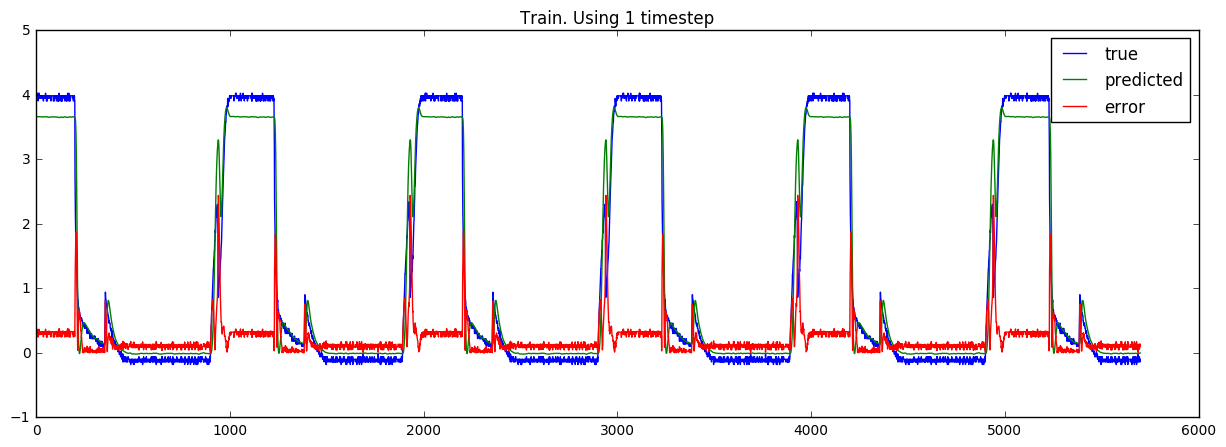

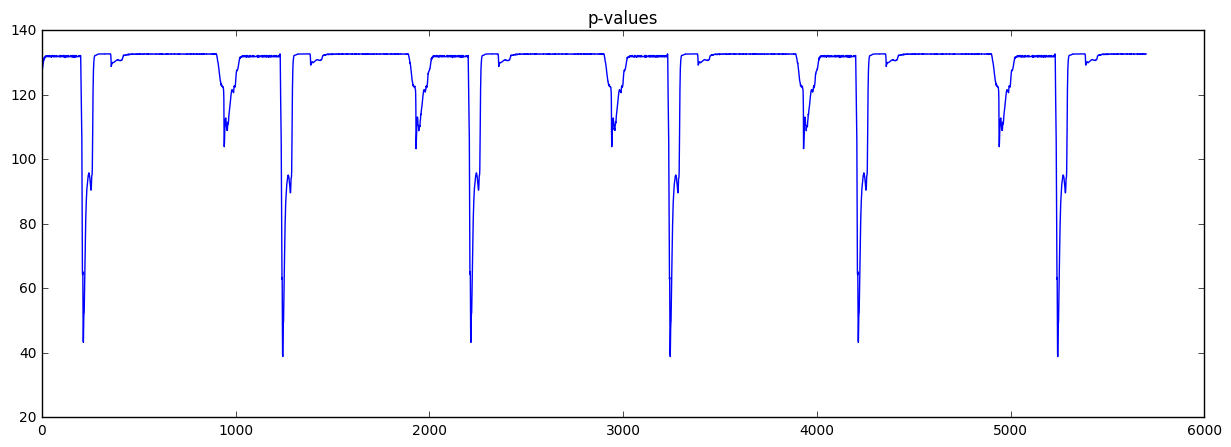

In [136]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print mean
print cov
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true[100:],label='true')
plt.plot(train_predictions[100:,0],label='predicted')
plt.plot(abs(train_true[100:] - train_predictions[100:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values[100:])
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [130]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
v2_true_anomalies = np.where(validation2_labels[:,0]==1)
print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
v2_thresholds =v2_p_values[v2_true_anomalies]
print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
#print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
#print "Test. Location of anomalies: %s"%(test_true_anomalies)
#print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
#test_thresholds = test_p_values[test_true_anomalies]
#print "Test. p-values at true anomalies: %s"%(test_thresholds)




Validation2. Number True Anomalies: 8400
Validation2. Location of anomalies: [   0    1    2 ..., 8397 8398 8399]
validation2. True anomalies: [-1.46  1.18  0.14 ...,  0.42  0.42  0.38]
validation2. p-values at true anomalies: [ 118.56911479   93.34960011   99.25223241 ...,  130.02177384  130.07501248
  130.09018263]



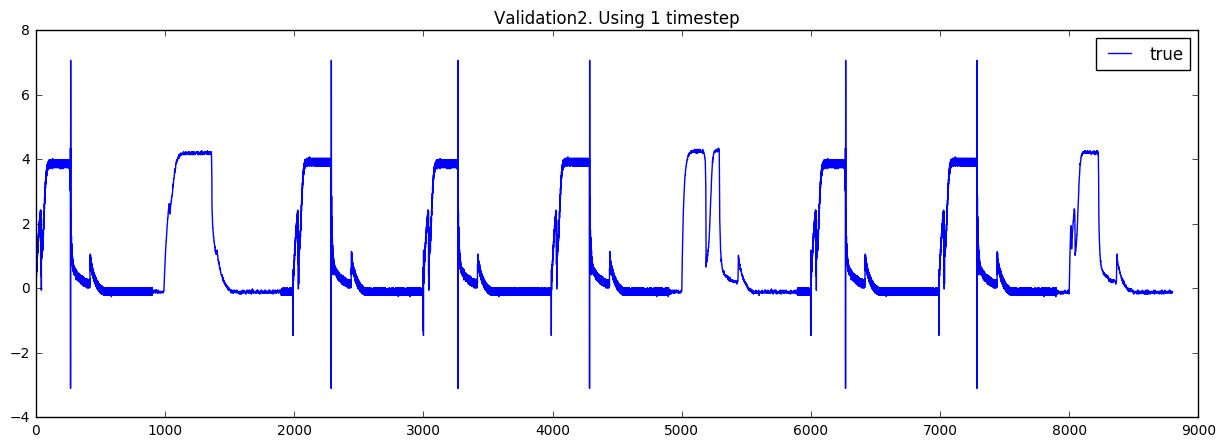

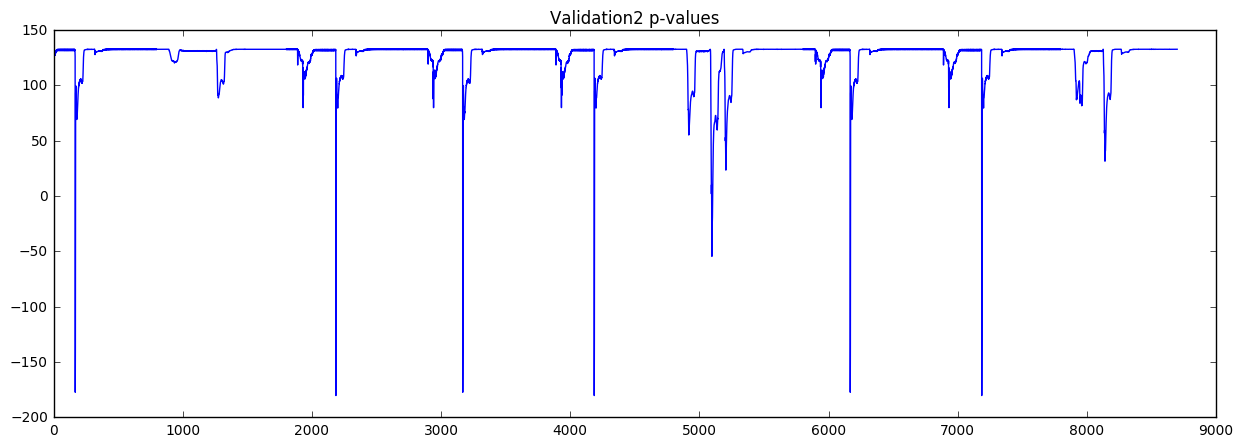

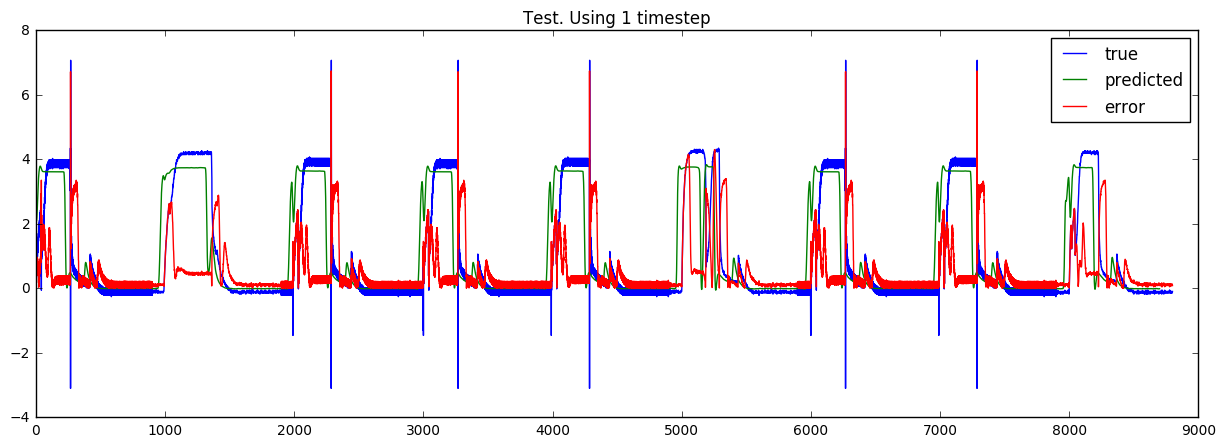

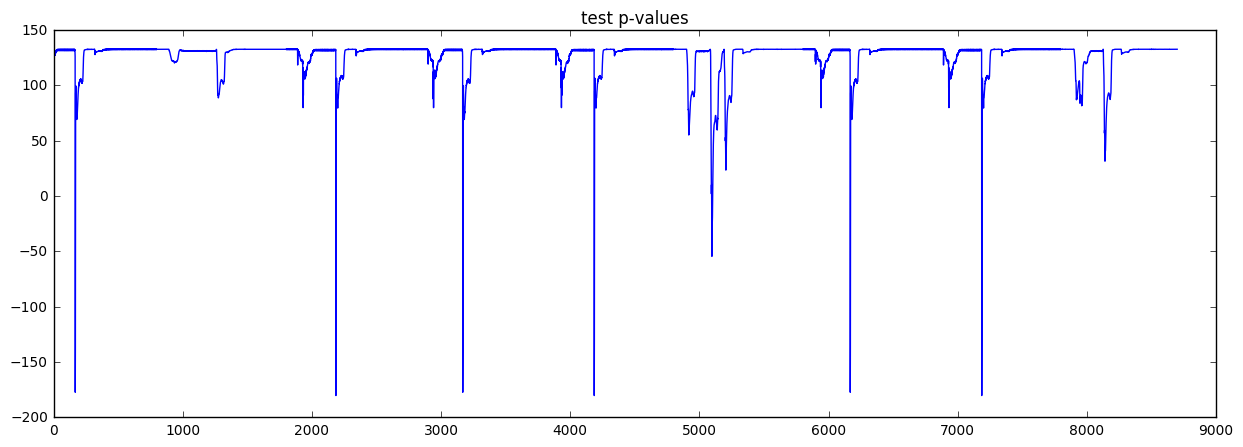

In [135]:
plt.figure(figsize=(15,5))
plt.plot(validation2_true,label='true')
# plt.plot(validation2_predictions[100:,49],label='predicted')
# plt.plot(abs(validation2_true - validation2_predictions[:,49]),label='error')
# for row in v2_true_anomalies:
#     plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Validation2. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(v2_p_values[100:])
plt.title("Validation2 p-values")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_true,label='true')
plt.plot(test_predictions[100:,49],label='predicted')
plt.plot(abs(test_true - test_predictions[:,49]),label='error')
# for row in test_true_anomalies:
#     plt.plot(row, test_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Test. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_p_values[100:])
plt.title("test p-values")
plt.show()


Candidate Thresholds: [-100]


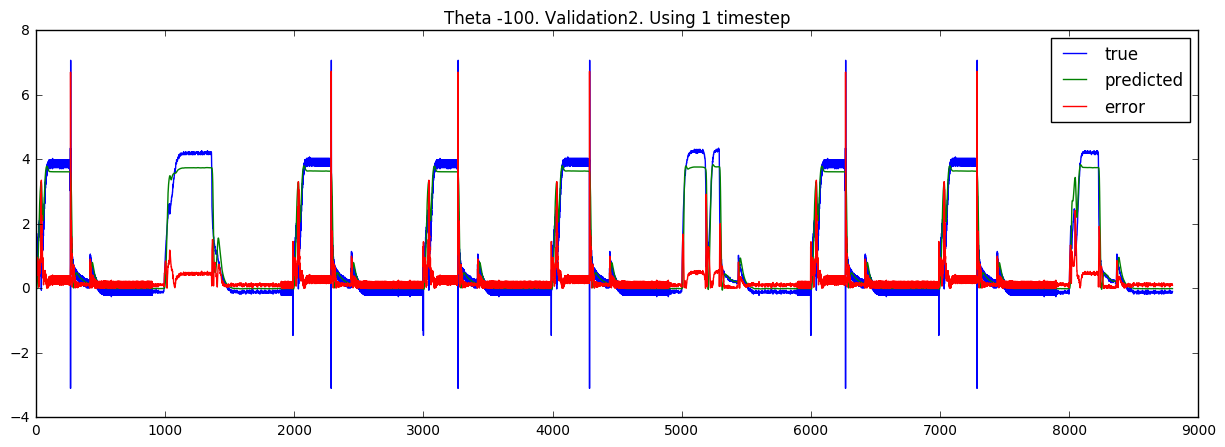

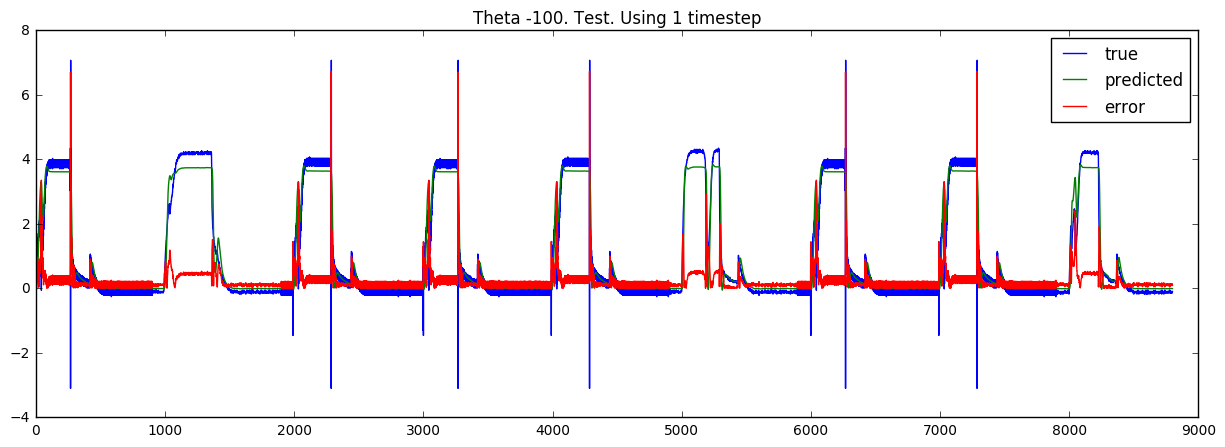

In [126]:
#thresholds = np.append(v2_thresholds,test_thresholds)

#thresholds =v2_thresholds
thresholds =[-100]
print
print "Candidate Thresholds: %s"%(thresholds)


for i in thresholds:
    theta= i
    test_potential_anomalies = np.where(test_p_values <= theta)
    v2_potential_anomalies = np.where(v2_p_values <= theta)
    plt.figure(figsize=(15,5))
    plt.plot(validation2_true,label='true')
    plt.plot(validation2_predictions[:,0],label='predicted')
    plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='error')
#     for row in v2_true_anomalies:
#         plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
#     for row in v2_potential_anomalies:
#         plt.plot(row, validation2_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Validation2. Using 1 timestep"%(i))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(test_true,label='true')
    plt.plot(test_predictions[:,0],label='predicted')
    plt.plot(abs(test_true - test_predictions[:,0]),label='error')
#     for row in test_true_anomalies:
#         plt.plot(row, test_true[row], 'r.', markersize=20.0)
#     for row in test_potential_anomalies:
#         plt.plot(row, test_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Test. Using 1 timestep"%(i))
    plt.show()
